# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **25.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **28.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
from __future__ import annotations
from typing import List
import descents
import numpy as np
from descents import VanillaGradientDescent
from descents import StochasticDescent
from descents import BaseDescent
from descents import get_descent
from descents import MomentumDescent
from descents import Adam

In [3]:
%autoreload 2

import numpy as np
import pandas as pd
from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

In [6]:
def get_descent(descent_config: dict) -> BaseDescent:
    descent_name = descent_config.get('descent_name', 'full')
    regularized = descent_config.get('regularized', False)

    descent_mapping: Dict[str, Type[BaseDescent]] = {
        'full': VanillaGradientDescent if not regularized else VanillaGradientDescentReg,
        'stochastic': StochasticDescent if not regularized else StochasticDescentReg,
        'momentum': MomentumDescent if not regularized else MomentumDescentReg,
        'adam': Adam if not regularized else AdamReg
    }

    if descent_name not in descent_mapping:
        raise ValueError(f'Incorrect descent name, use one of these: {descent_mapping.keys()}')

    descent_class = descent_mapping[descent_name]

    return descent_class(**descent_config.get('kwargs', {}))

In [7]:
for descent_name in ['full', 'stochastic','momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

In [8]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [9]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)


assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/29933/run-report/55596587/


* **StochasticDescent**: https://contest.yandex.ru/contest/29933/run-report/55596614/

* **MomentumDescent**: https://contest.yandex.ru/contest/29933/run-report/55596645/


* **Adam**:https://contest.yandex.ru/contest/29933/run-report/55596691/


* **LinearRegression**: https://contest.yandex.ru/contest/29933/run-report/55596911/

In [ ]:
# ник elizaveta.petyaeva

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [11]:
data = pd.read_csv('autos.csv')

In [12]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


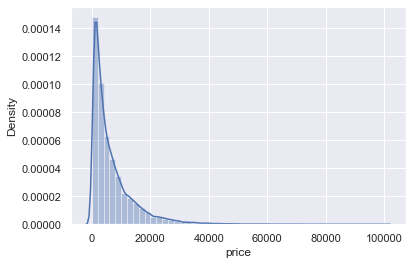

In [13]:
sns.distplot(data['price'])
sns.set(rc={'figure.figsize':(10,10)}) # у нас есть оч длинный правый хвост, то есть есть машины с супер высокой ценой

In [14]:
data['price'].quantile([.01, .99])

0.01      250.0
0.99    37900.0
Name: price, dtype: float64

<AxesSubplot:>

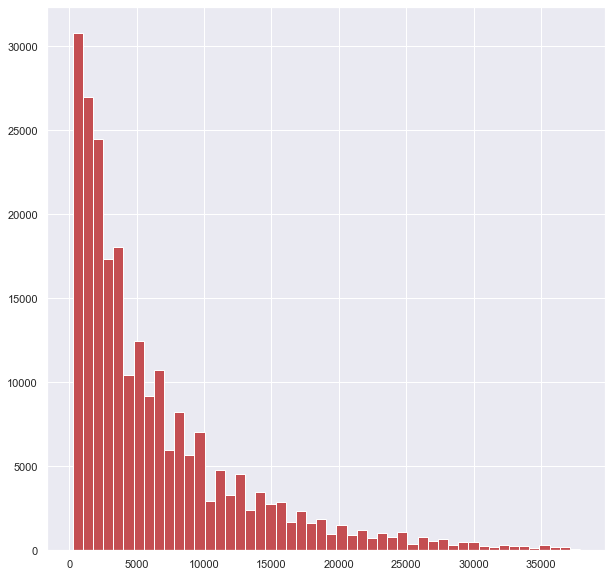

In [15]:
data[
    ((data['price'] > 250.0) &
    (data['price'] < 37900.0))
]['price'].hist(bins=50, color='r') 

In [16]:
data = data.drop(data[
    (
     (data['price'] < 250.0) |
     (data['price'] > 37900.0)
    )
].index) # удалим выбросы

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


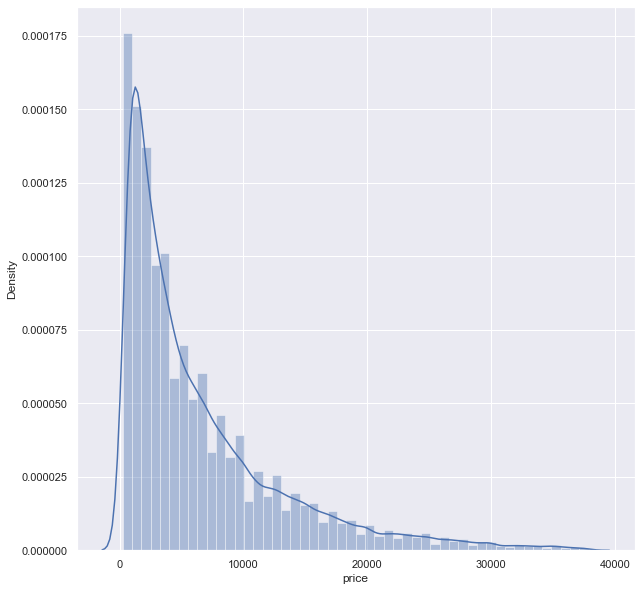

In [17]:
sns.distplot(data['price'])
sns.set(rc={'figure.figsize':(20,20)})

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


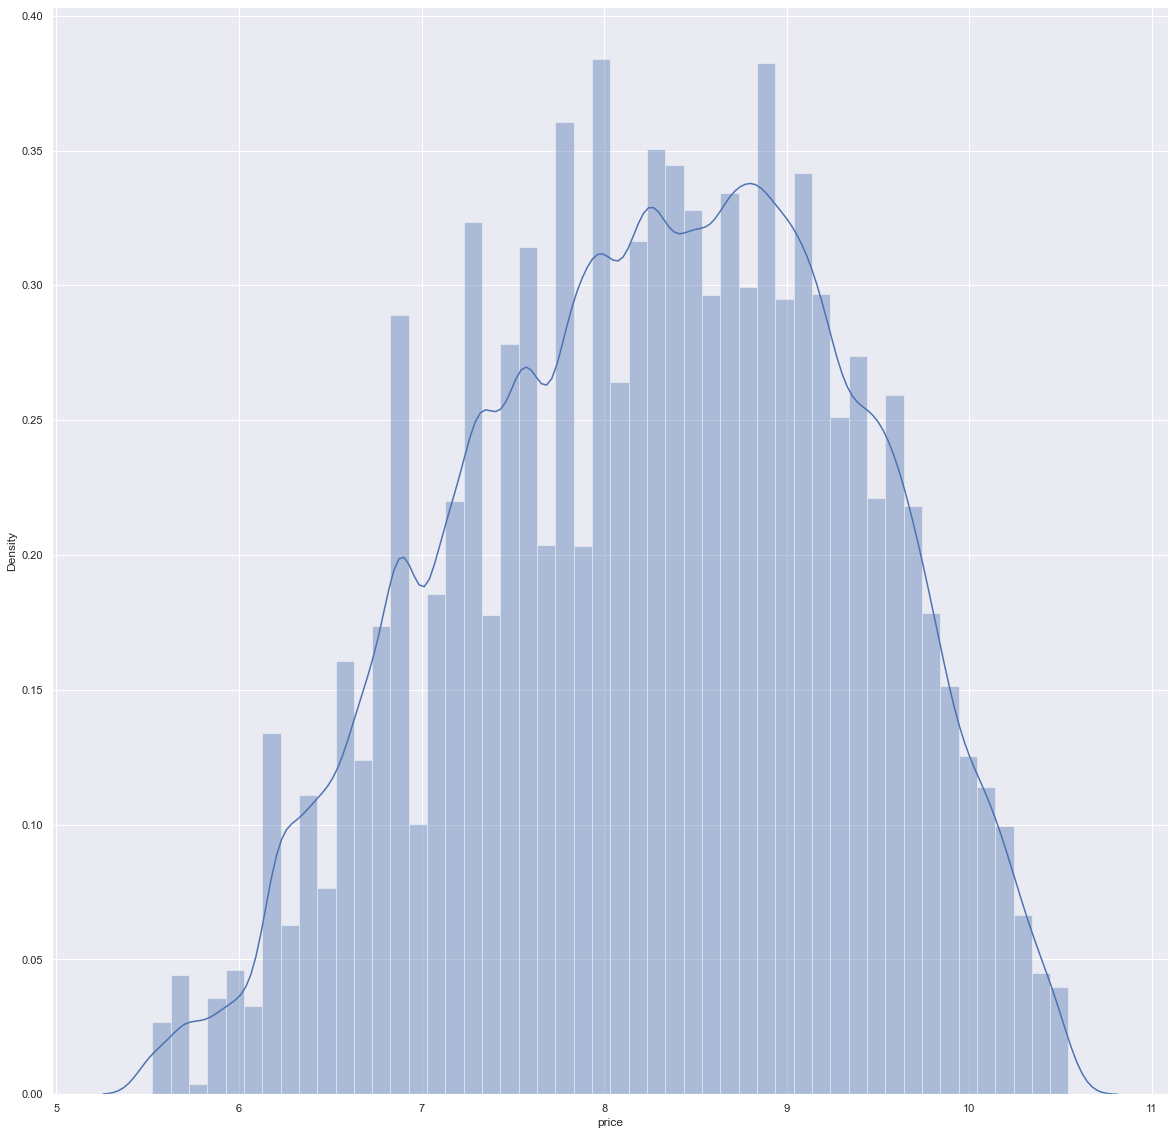

In [18]:
sns.distplot(np.log1p(data['price']))
sns.set(rc={'figure.figsize':(10,10)}) # да, так выглядит поприличней

In [19]:
data['log_price'] = np.log1p(data['price'])

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236684 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              236684 non-null  object 
 1   model              236684 non-null  object 
 2   vehicleType        236684 non-null  object 
 3   gearbox            236684 non-null  object 
 4   fuelType           236684 non-null  object 
 5   notRepairedDamage  236684 non-null  object 
 6   powerPS            236684 non-null  int64  
 7   kilometer          236684 non-null  int64  
 8   autoAgeMonths      236684 non-null  int64  
 9   price              236684 non-null  int64  
 10  log_price          236684 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 21.7+ MB


In [21]:
data['brand'].value_counts() # категориальный

volkswagen       48510
bmw              28704
mercedes_benz    24992
opel             23379
audi             23326
ford             15460
renault          10313
peugeot           7216
fiat              5544
skoda             4360
seat              4306
mazda             3778
toyota            3508
citroen           3340
nissan            3237
mini              2790
hyundai           2653
smart             2569
volvo             2426
mitsubishi        1903
kia               1831
honda             1831
alfa_romeo        1596
suzuki            1529
chevrolet         1218
porsche            997
chrysler           933
dacia              690
jeep               545
land_rover         535
subaru             503
jaguar             427
daihatsu           407
saab               401
daewoo             285
lancia             284
rover              231
lada               127
Name: brand, dtype: int64

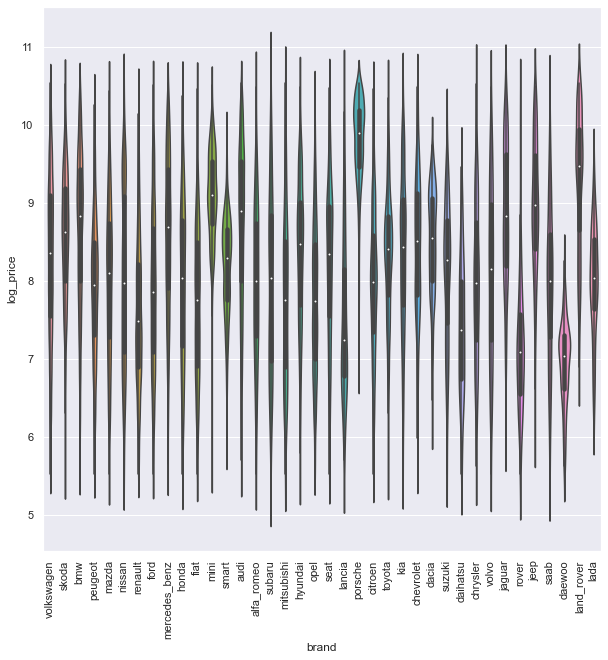

In [22]:
ax = sns.violinplot(x='brand', y='log_price', data=data)
sns.set(rc={'figure.figsize':(20,10)})
ax.tick_params(axis='x', rotation=90)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


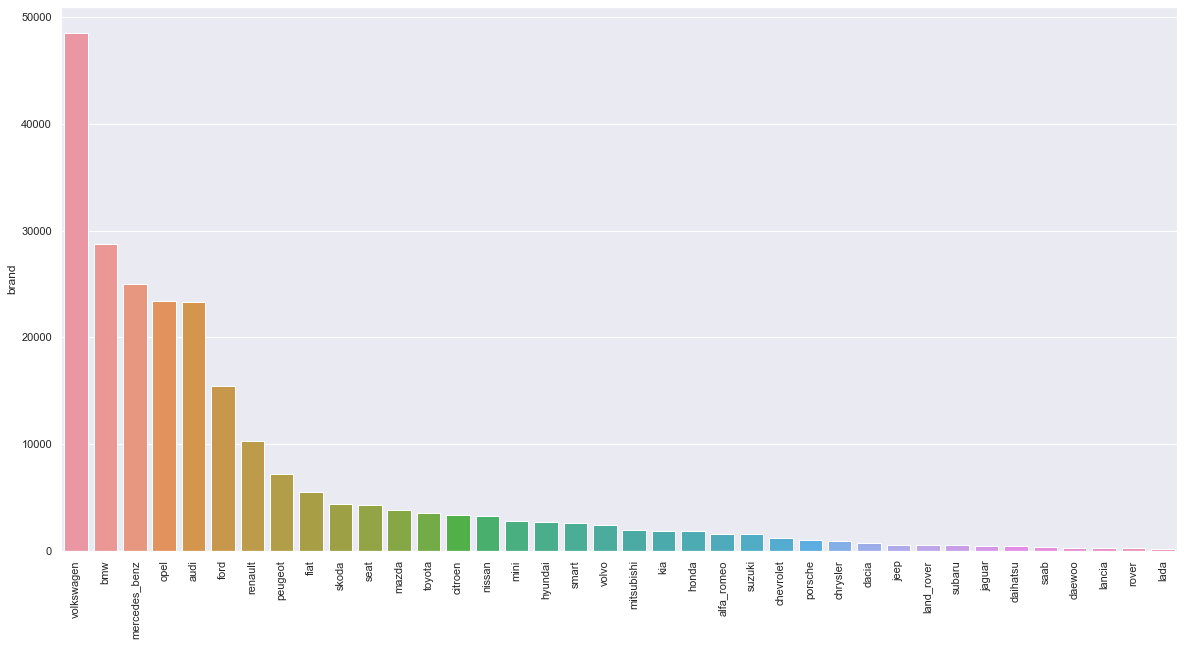

In [23]:
ax = sns.barplot(data['brand'].value_counts().index, data['brand'].value_counts())
ax.tick_params(axis='x', rotation=90)

In [24]:
data['model'].value_counts()

golf          19871
andere        17642
3er           14892
a4             7532
passat         7199
              ...  
rangerover        3
serie_3           3
serie_2           3
samara            2
elefantino        1
Name: model, Length: 248, dtype: int64

In [25]:
data['model'].value_counts()[data['model'].value_counts() < 100] # будем считать, что < 100 - это выбросы

v_klasse              99
sirion                93
navara                91
exeo                  90
s_type                88
niva                  87
aveo                  87
defender              86
juke                  85
citigo                83
discovery             83
900                   79
antara                79
justy                 76
range_rover_sport     75
mii                   74
kalos                 70
range_rover           69
r19                   60
crossfire             54
90                    51
range_rover_evoque    49
v60                   43
gl                    39
lanos                 39
nubira                37
lybra                 32
croma                 32
amarok                31
lodgy                 29
145                   26
terios                25
kaefer                25
delta                 24
b_max                 24
9000                  19
musa                  17
charade               13
materia               12
kappa                 10


In [26]:
condition = data['model'].value_counts()[data['model'].value_counts() < 100].index
for c in condition:
    data = data.drop(data[data['model'] == c].index)

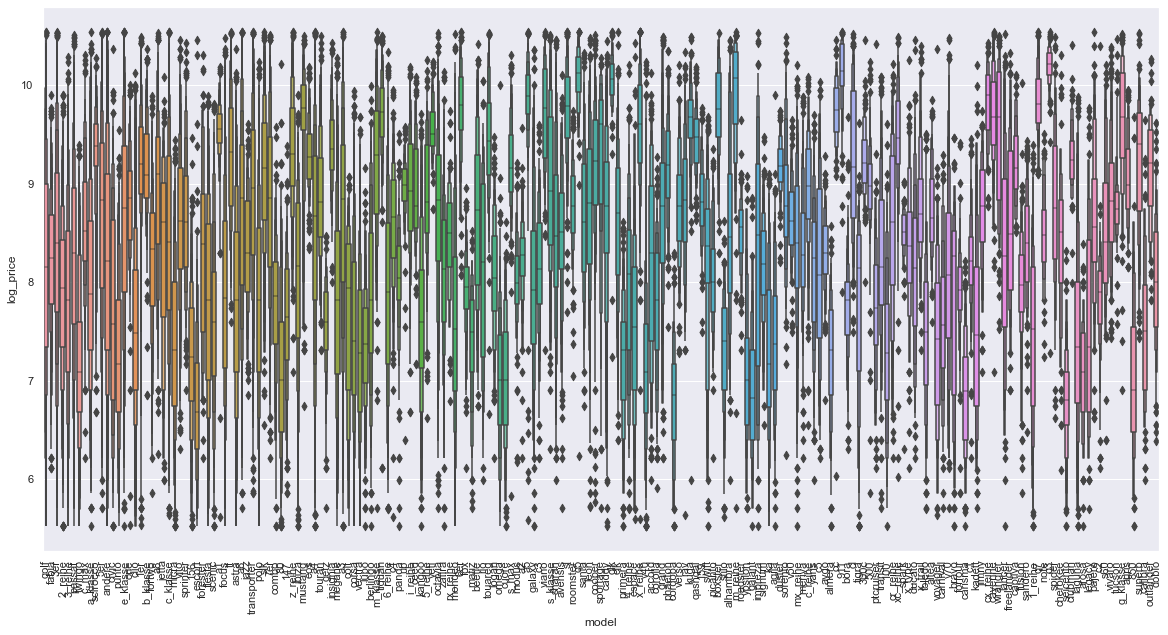

In [27]:
ax = sns.boxenplot(x='model', y='log_price', data=data)
sns.set(rc={'figure.figsize':(40,20)})
#ax.set(xlabel=None)
ax.tick_params(axis='x', rotation=90)

In [28]:
from matplotlib import pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


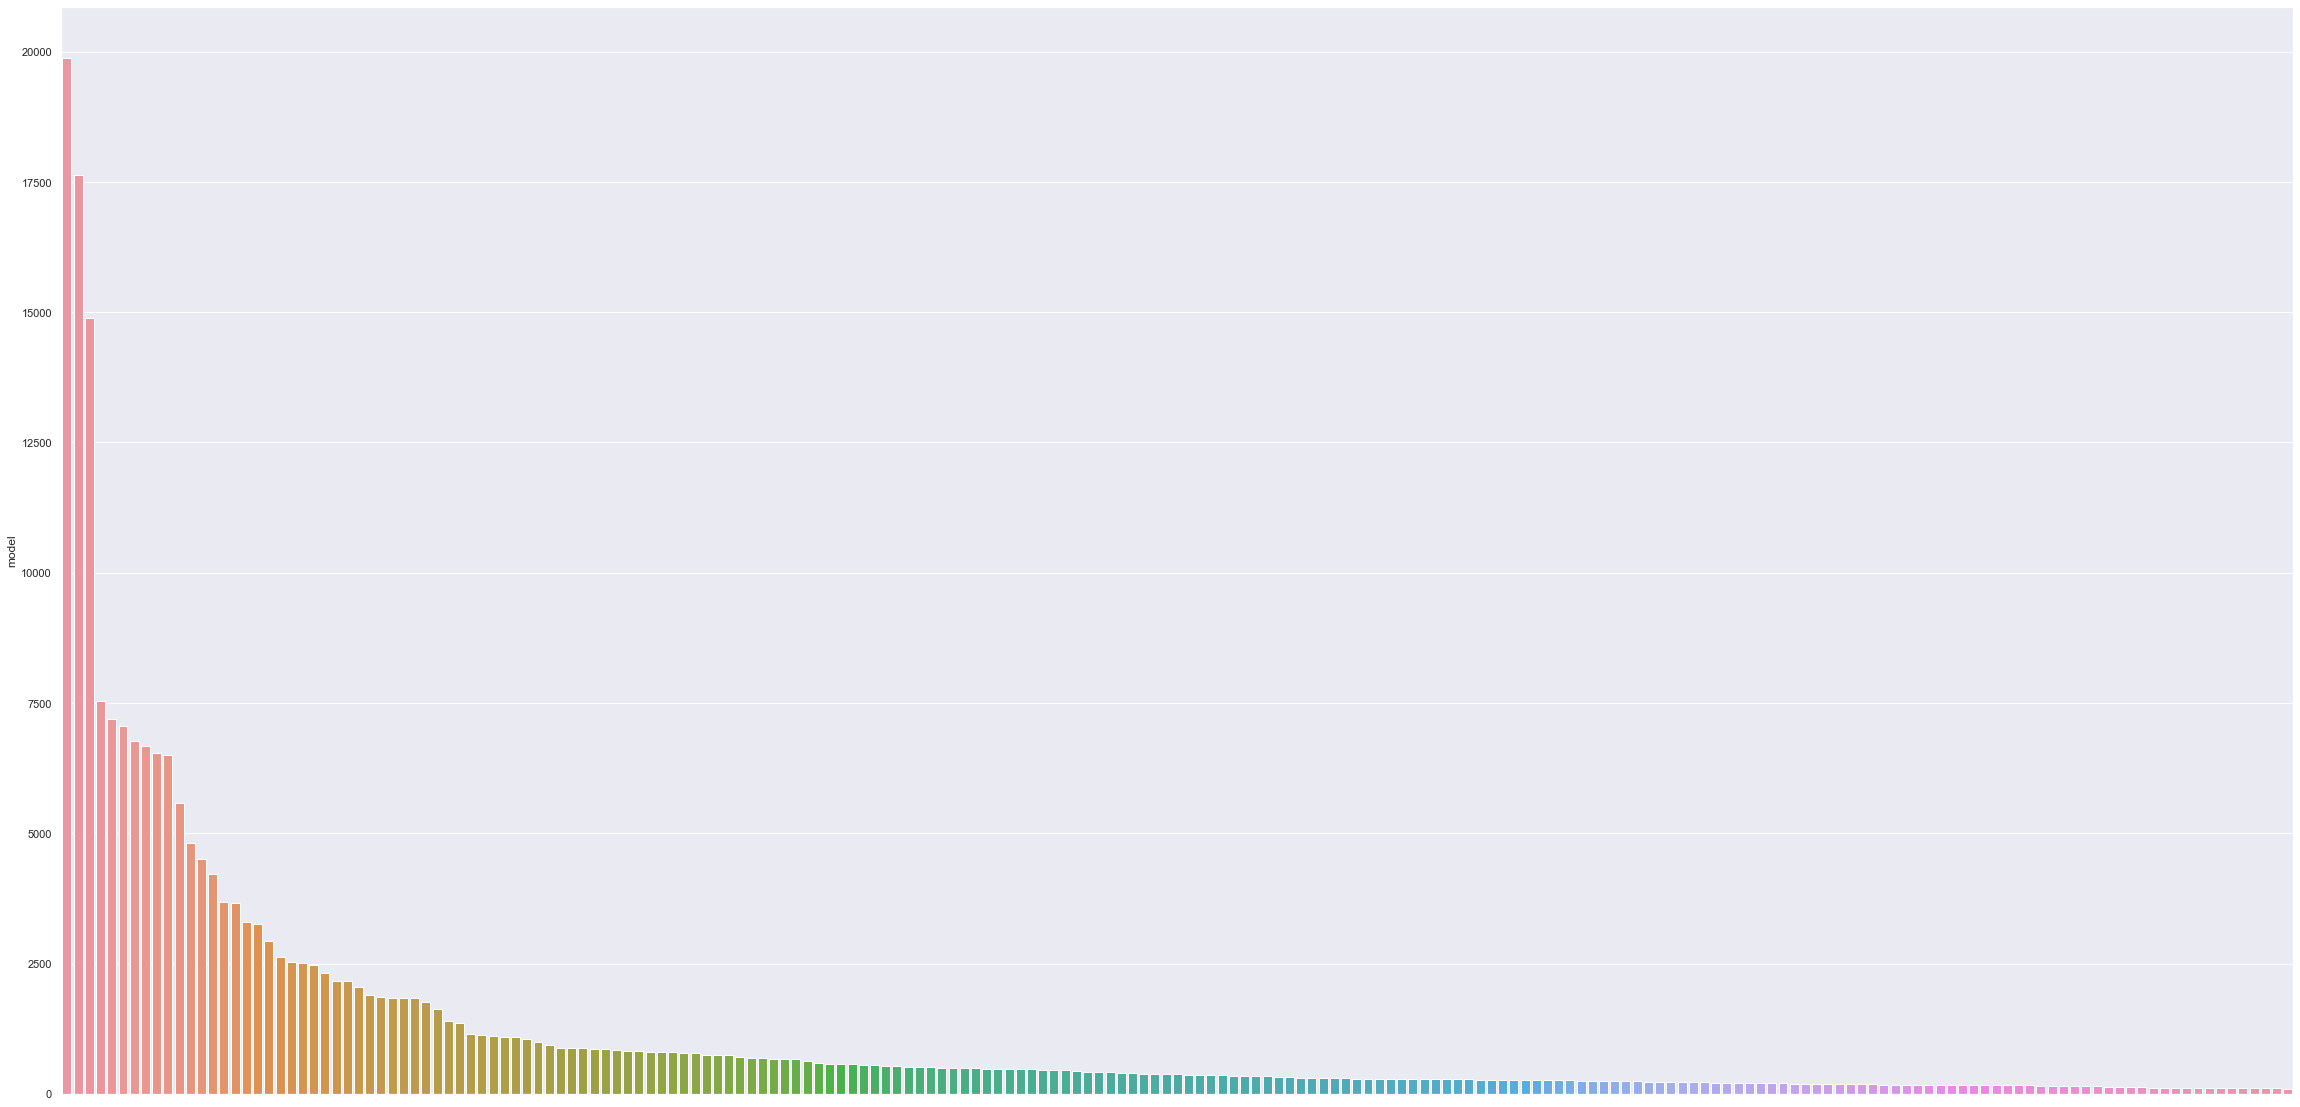

In [29]:
ax = sns.barplot(data['model'].value_counts().index, data['model'].value_counts())
ax.tick_params(axis='x', rotation=90)
plt.tick_params(
    axis='x',          # уберем нижние цифры в графике, чтобы не было черной полосы
    which='both',     
    labelbottom=False)

In [30]:
data['vehicleType'].value_counts() # категориальный

limousine     71218
kombi         50054
kleinwagen    48316
bus           23297
cabrio        16953
coupe         12861
suv           10356
andere         1403
Name: vehicleType, dtype: int64

<AxesSubplot:xlabel='vehicleType', ylabel='log_price'>

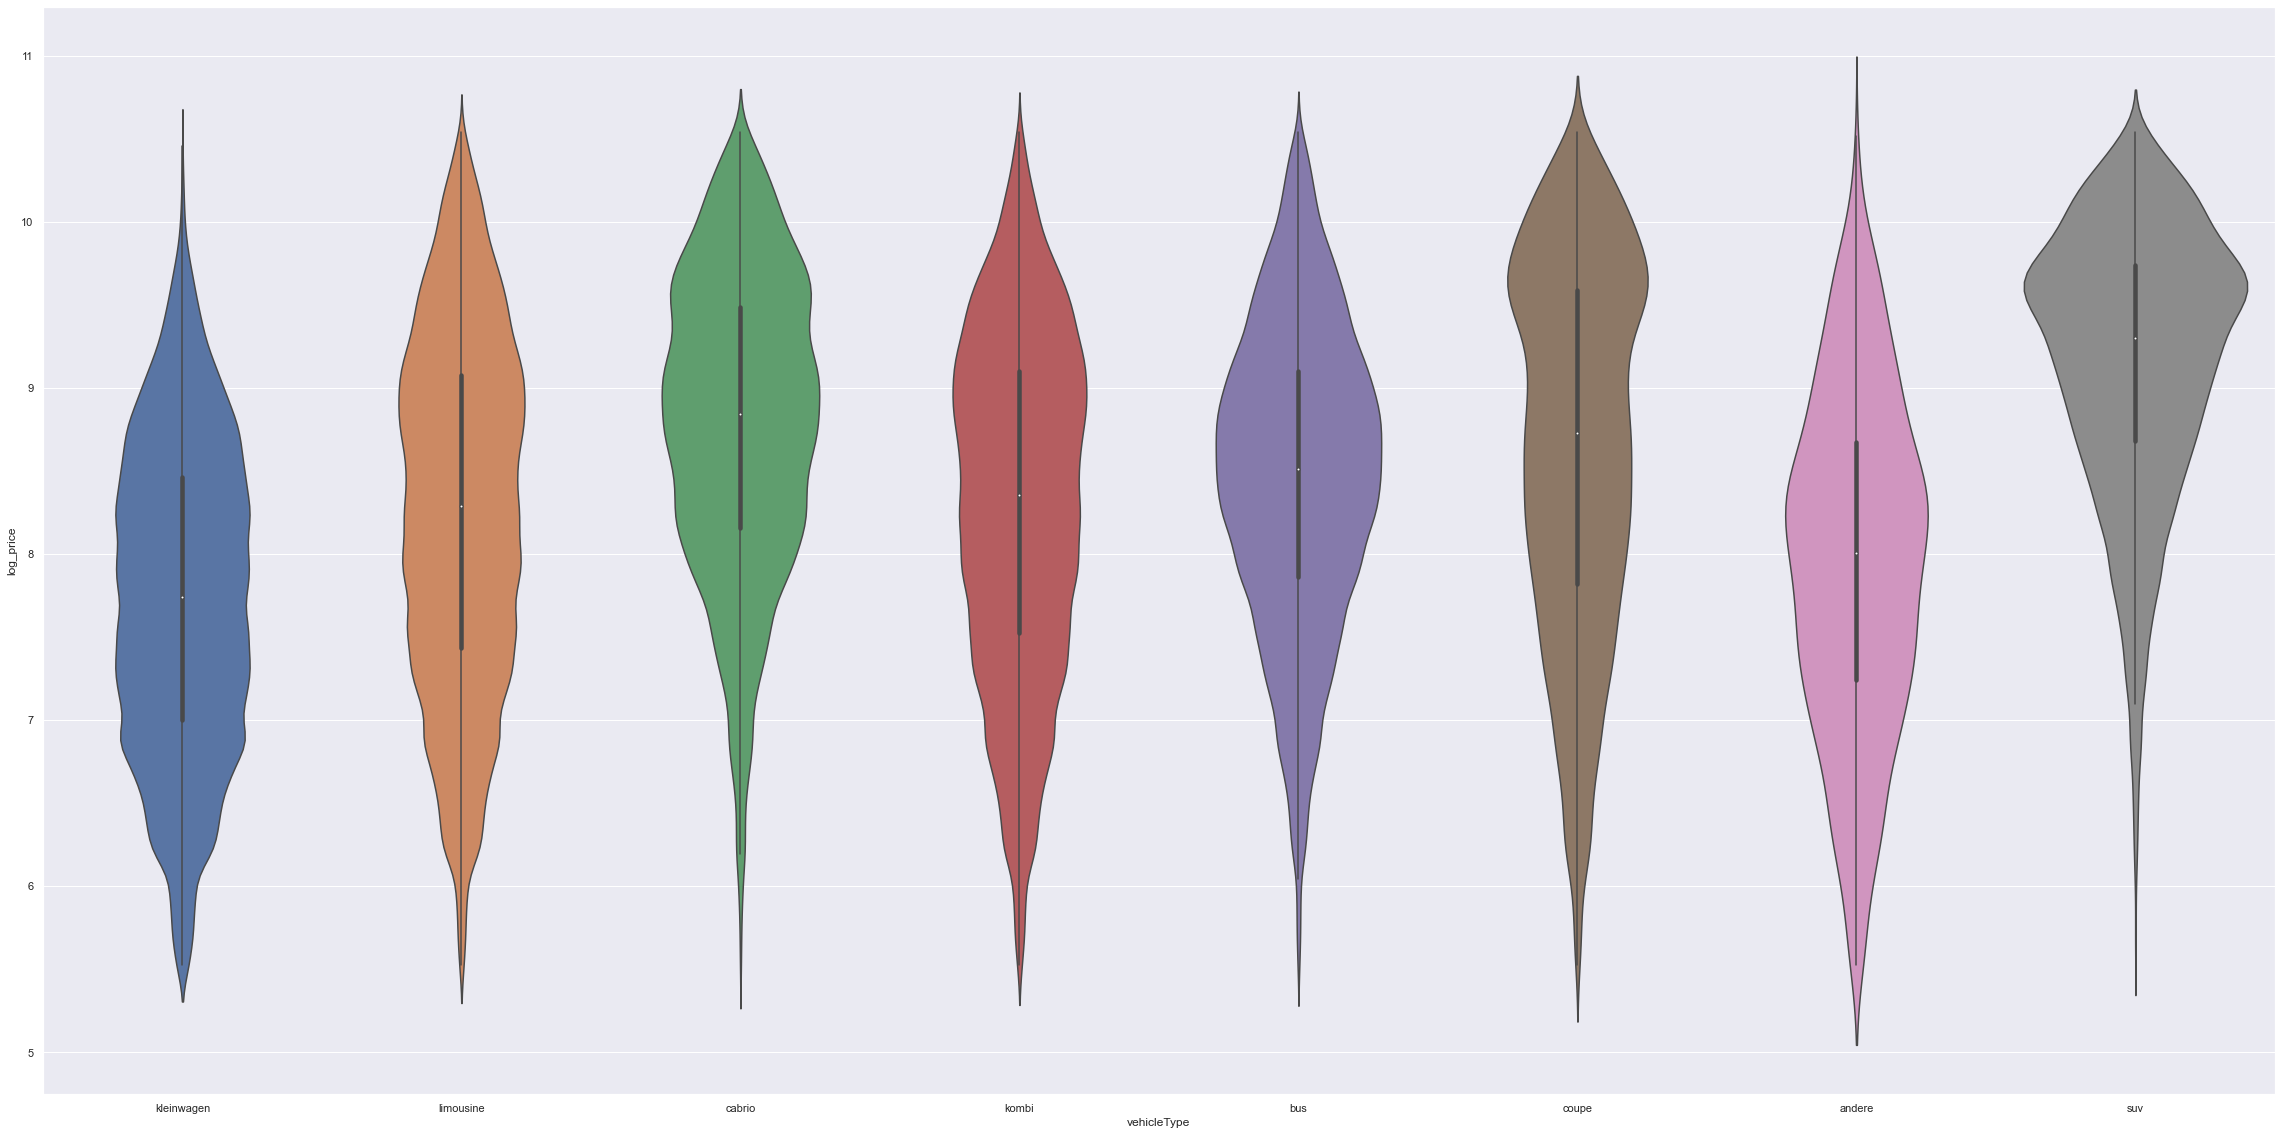

In [31]:
sns.violinplot(x='vehicleType', y='log_price', data=data)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='vehicleType'>

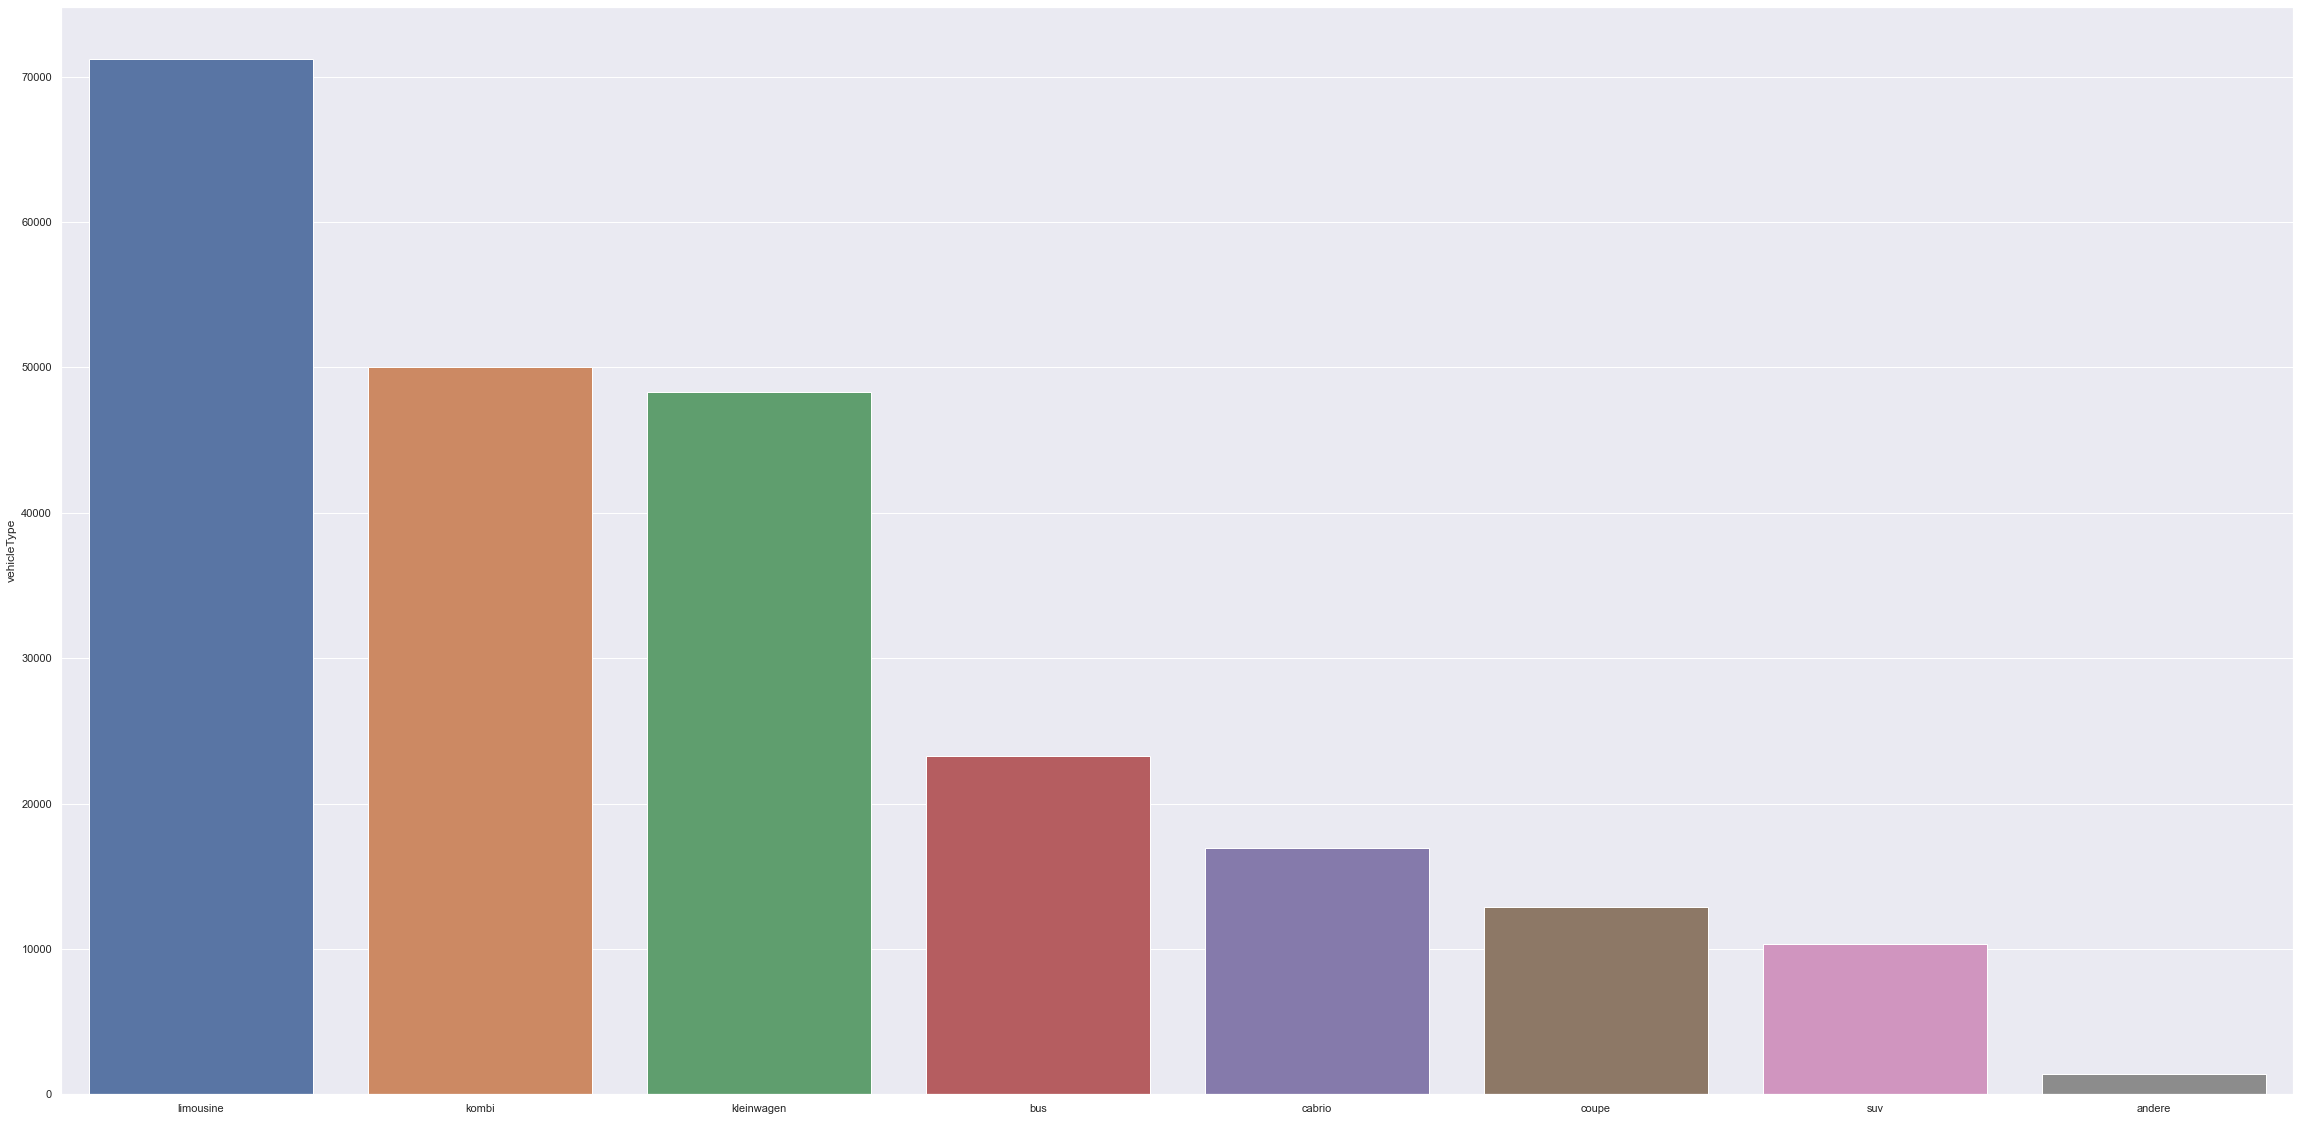

In [32]:
sns.barplot(data['vehicleType'].value_counts().index, data['vehicleType'].value_counts())

In [33]:
data['gearbox'].value_counts() # категориальный

manuell      179492
automatik     54966
Name: gearbox, dtype: int64

<AxesSubplot:xlabel='gearbox', ylabel='log_price'>

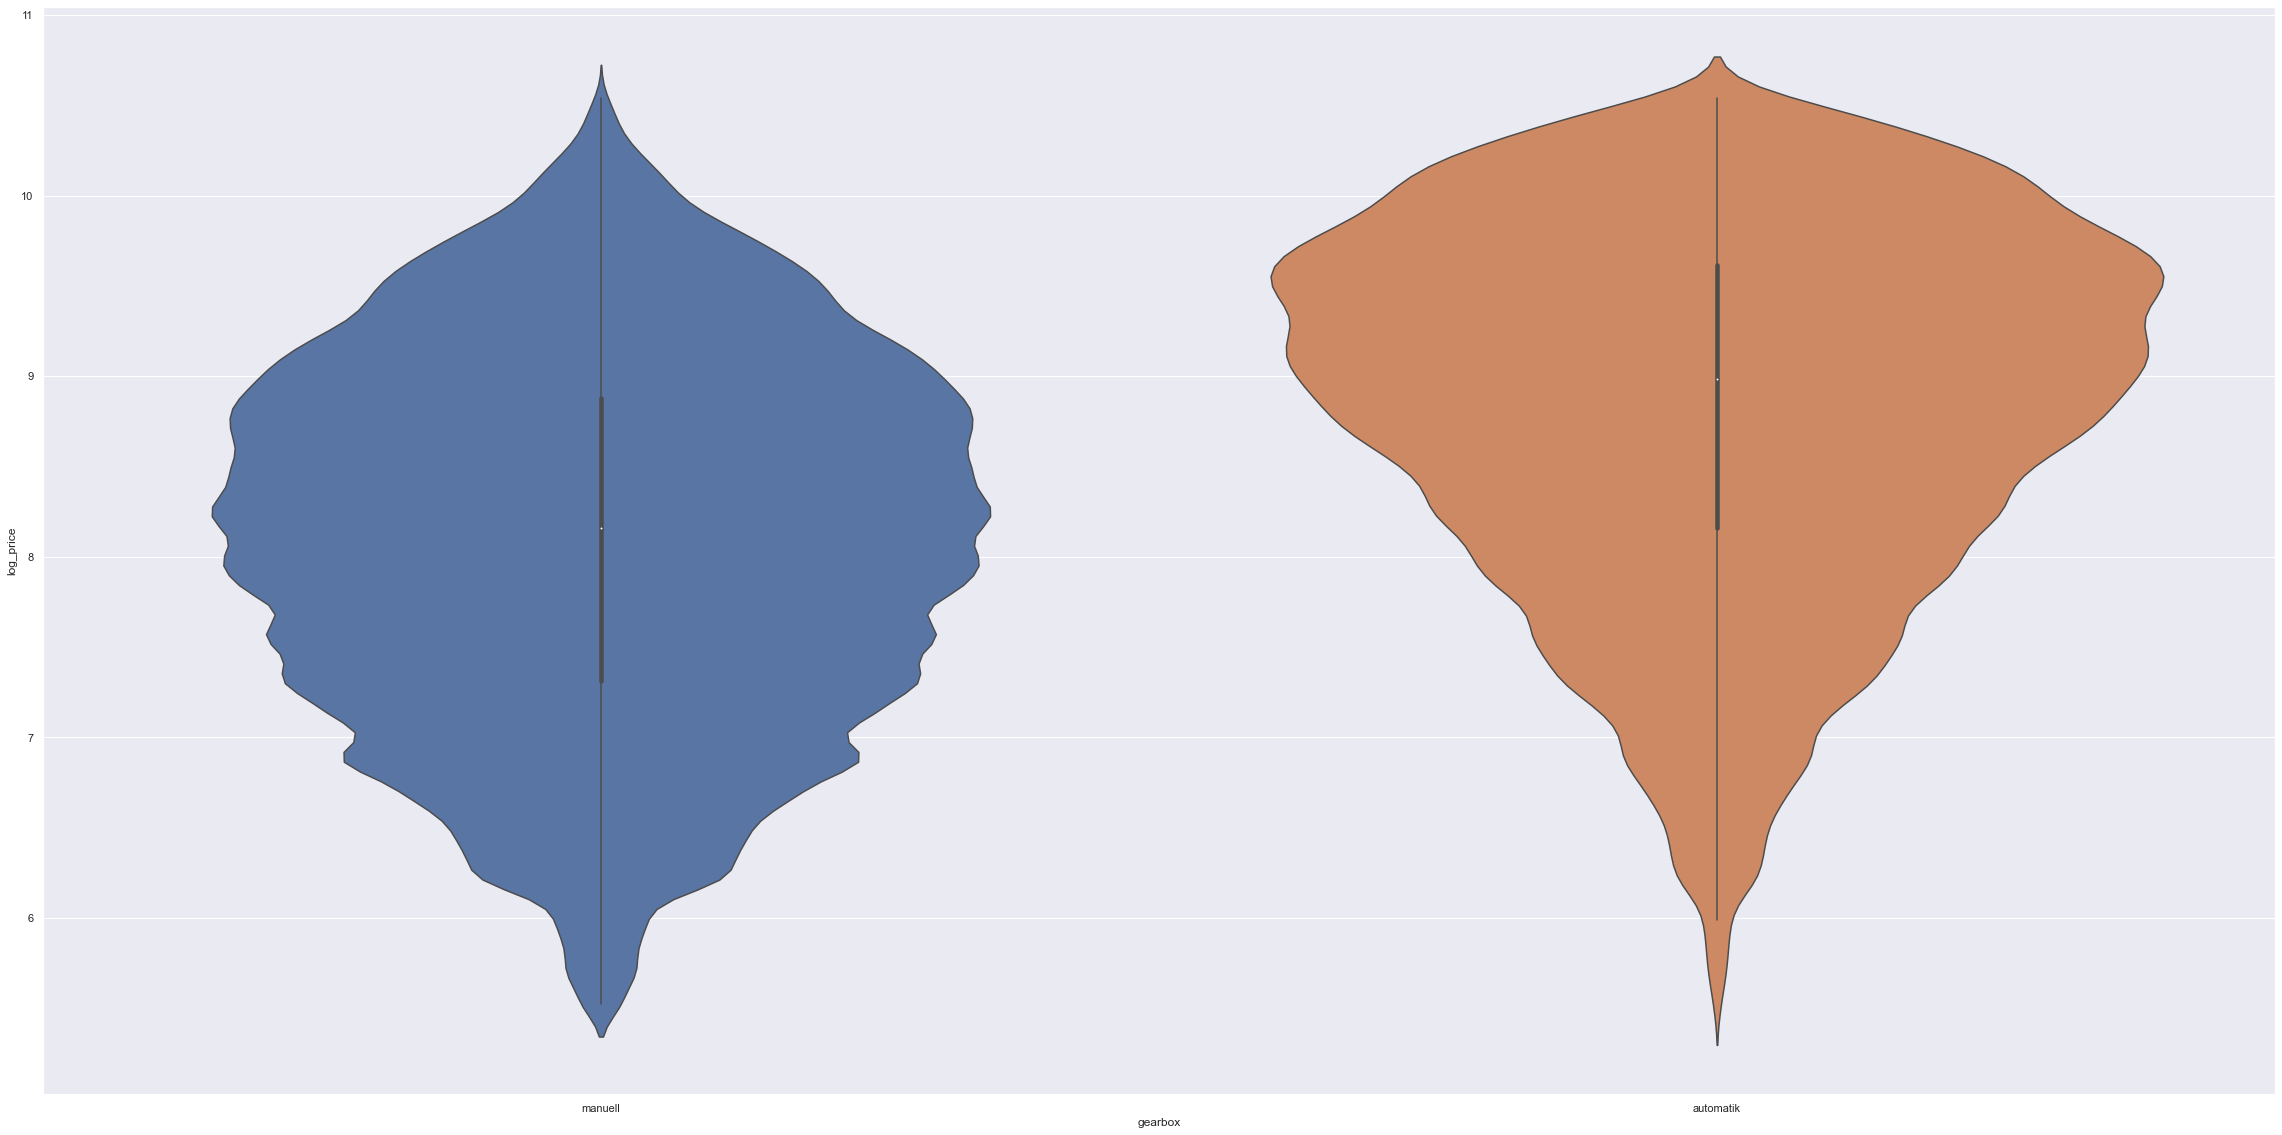

In [34]:
sns.violinplot(x='gearbox', y='log_price', data=data)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='gearbox'>

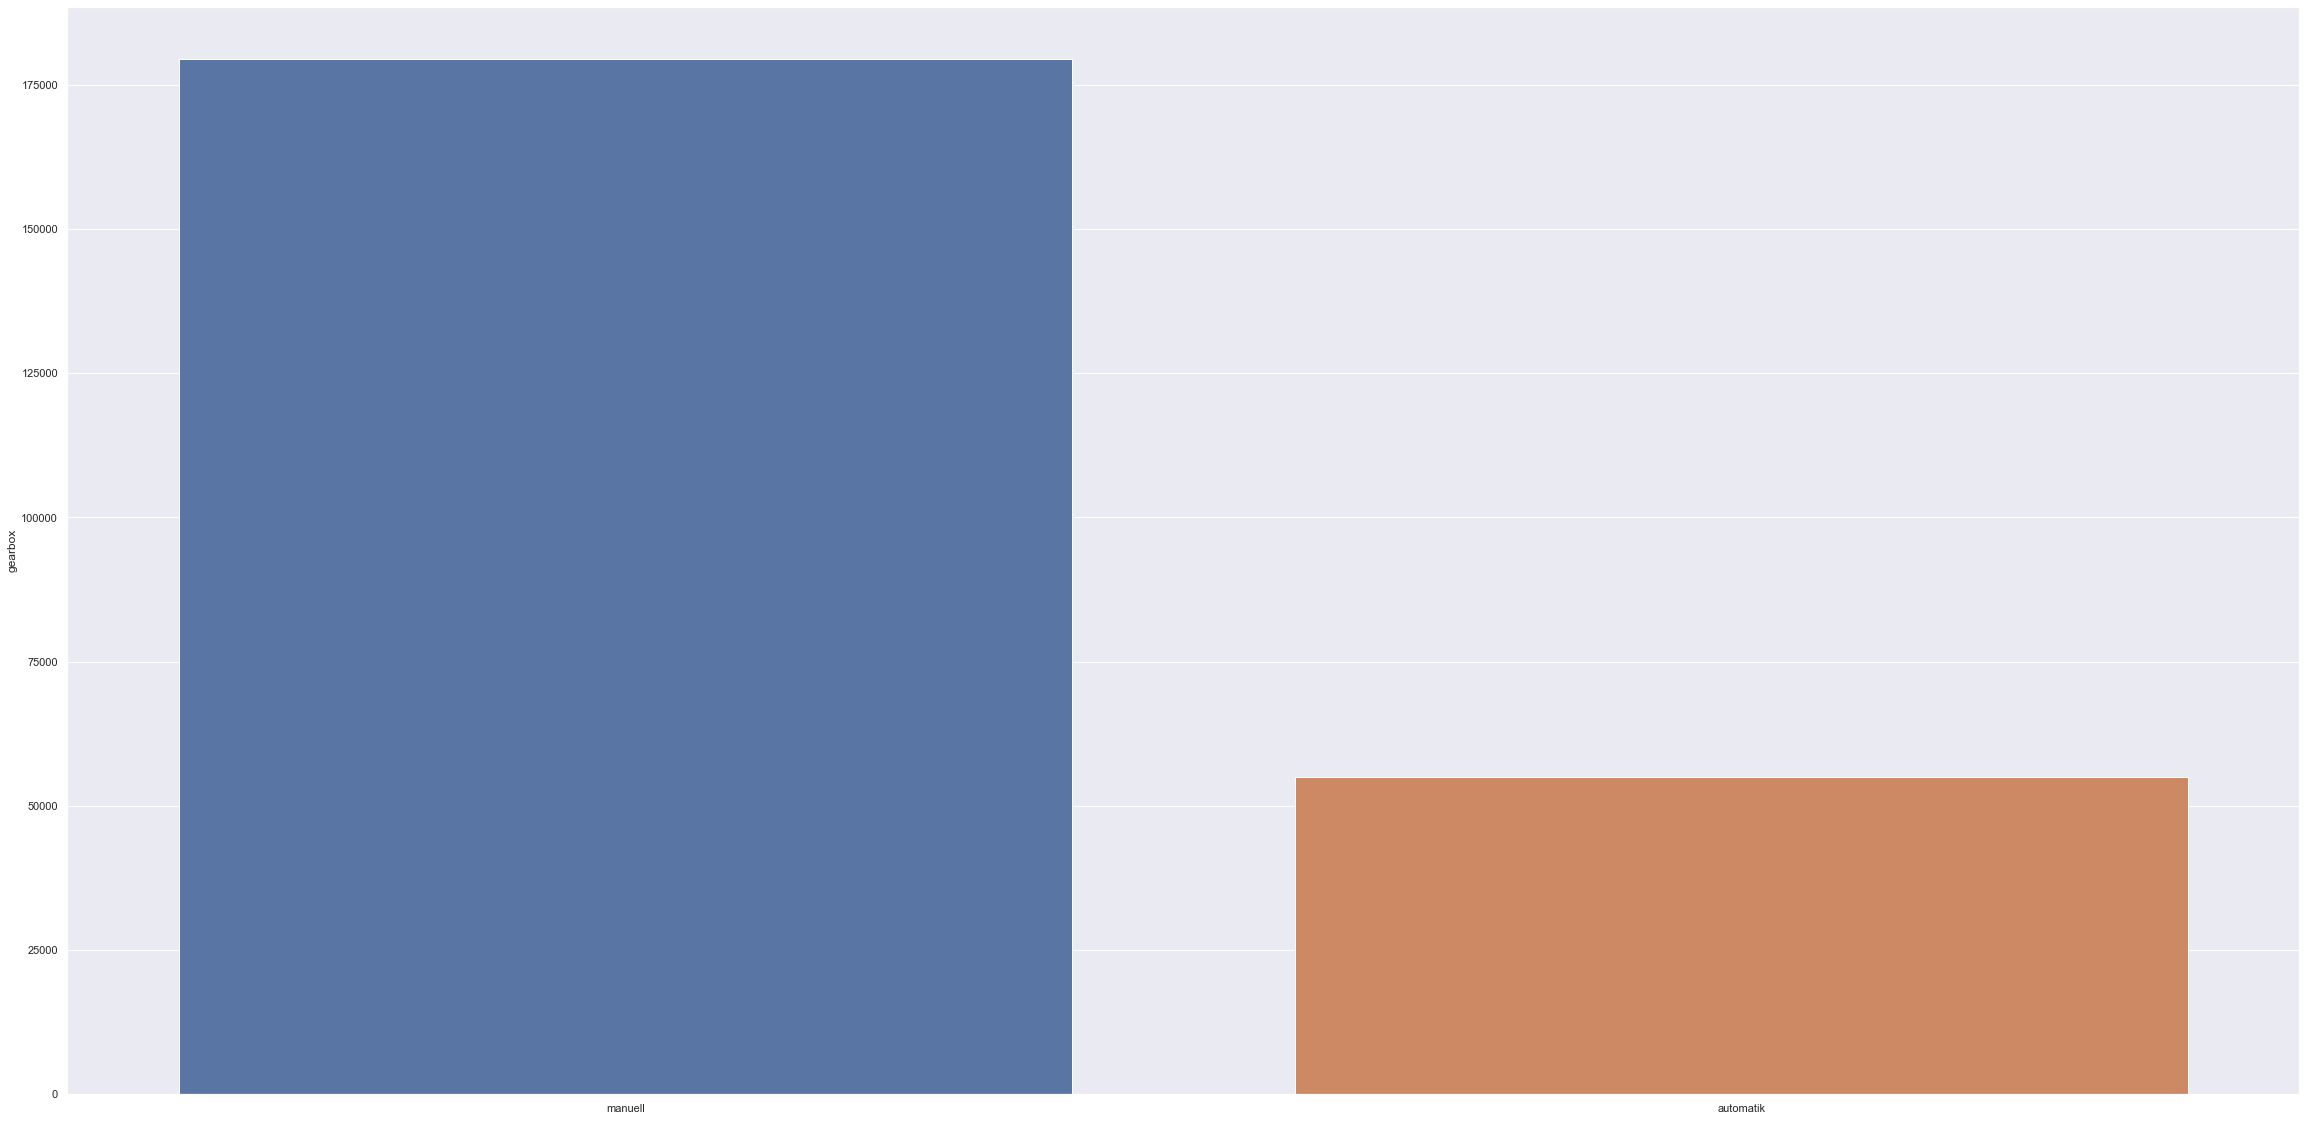

In [35]:
sns.barplot(data['gearbox'].value_counts().index, data['gearbox'].value_counts())

In [36]:
data['fuelType'].value_counts() # категориальный, из графика ниже мы видим, что 
#andere примерно похож по распределению цены на benzin, а elektro на hybrid - объединим эти категории

benzin     148981
diesel      81196
lpg          3613
cng           421
hybrid        190
andere         29
elektro        28
Name: fuelType, dtype: int64

<AxesSubplot:xlabel='fuelType', ylabel='log_price'>

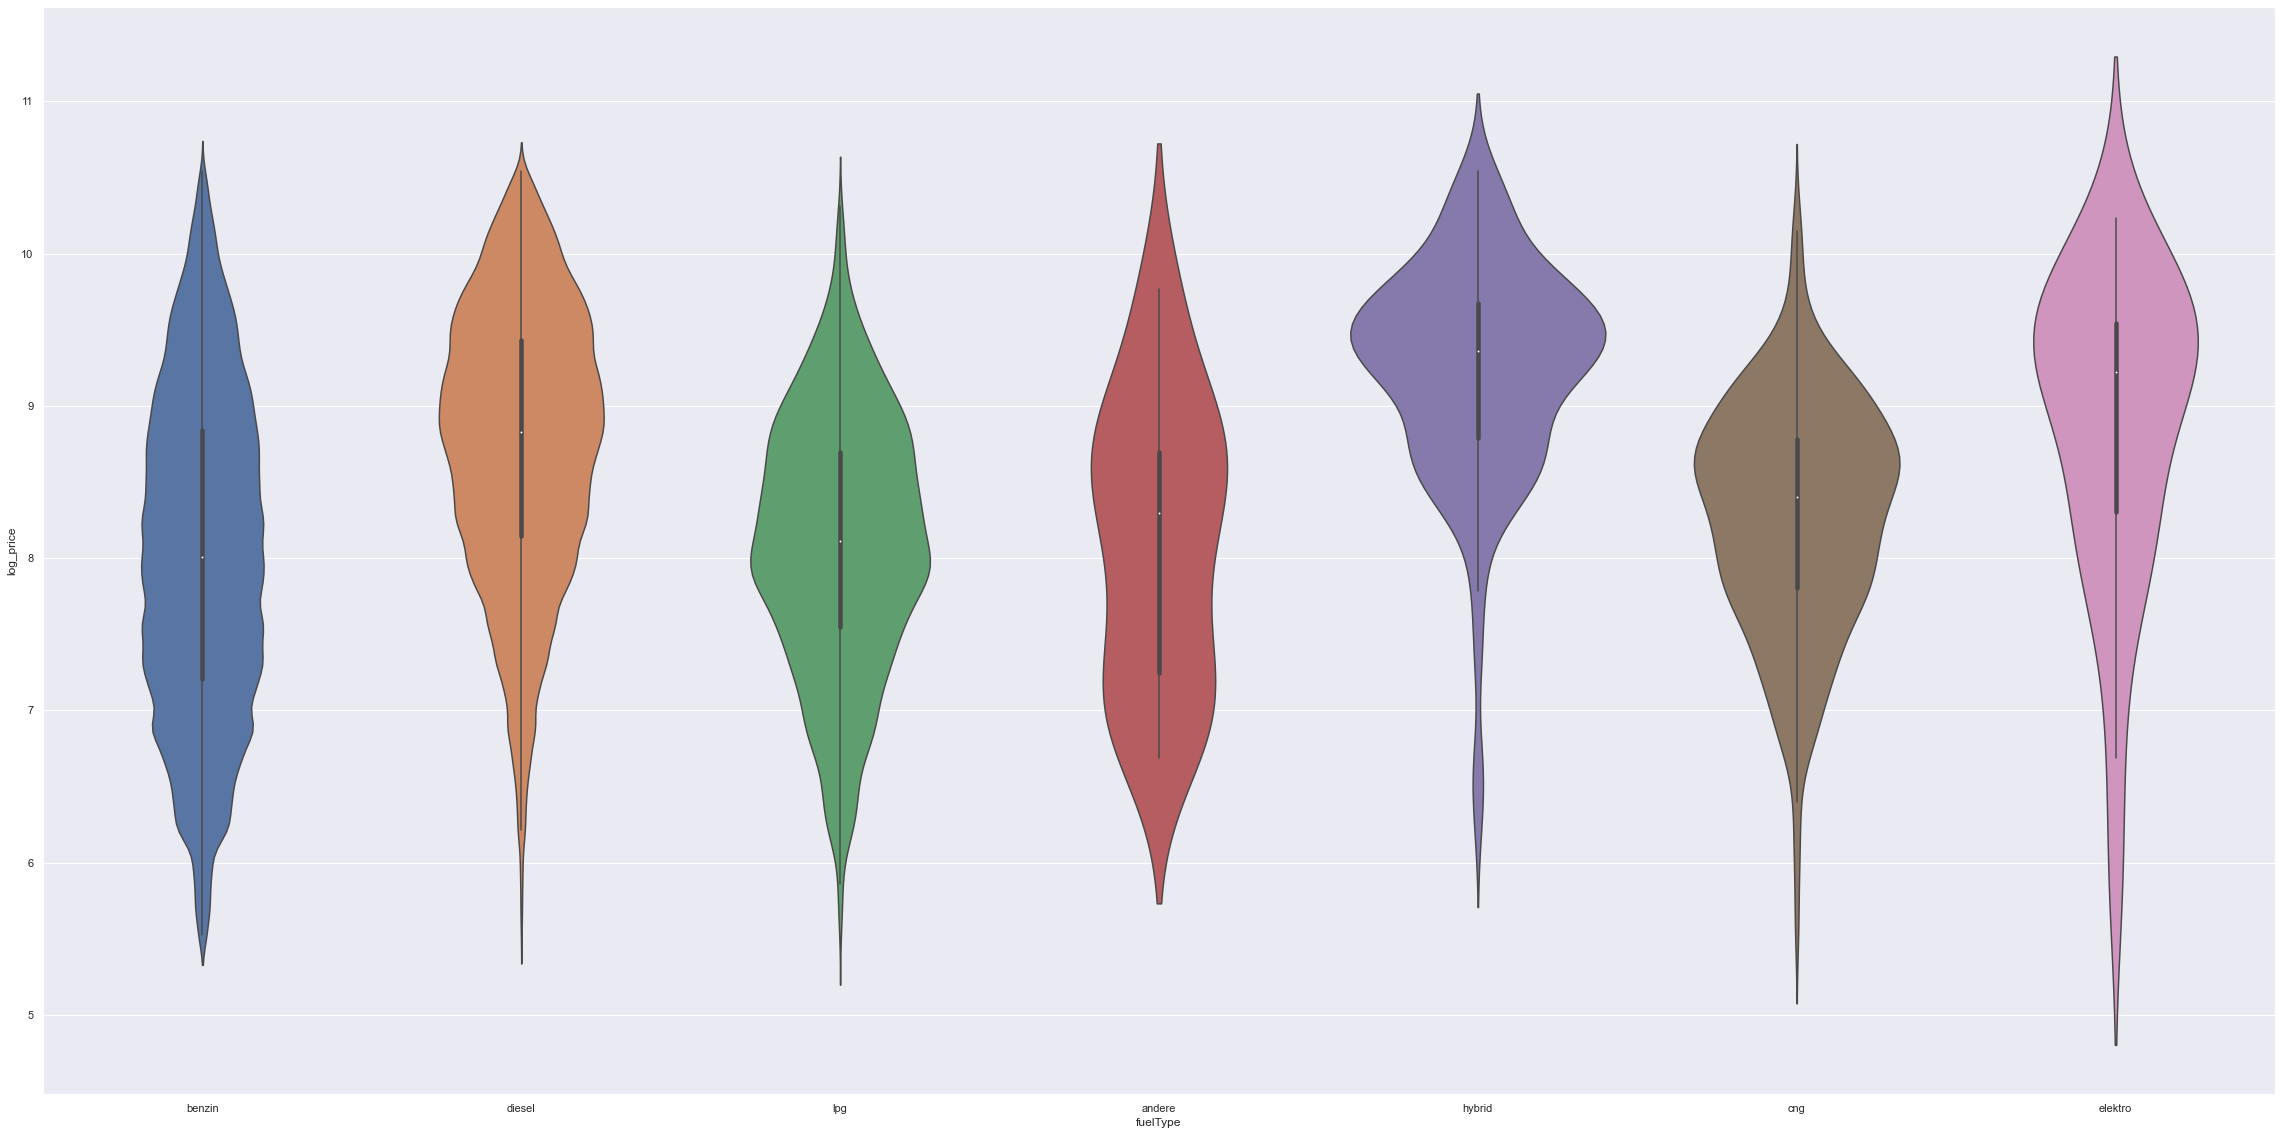

In [37]:
sns.violinplot(x='fuelType', y='log_price', data=data)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='fuelType'>

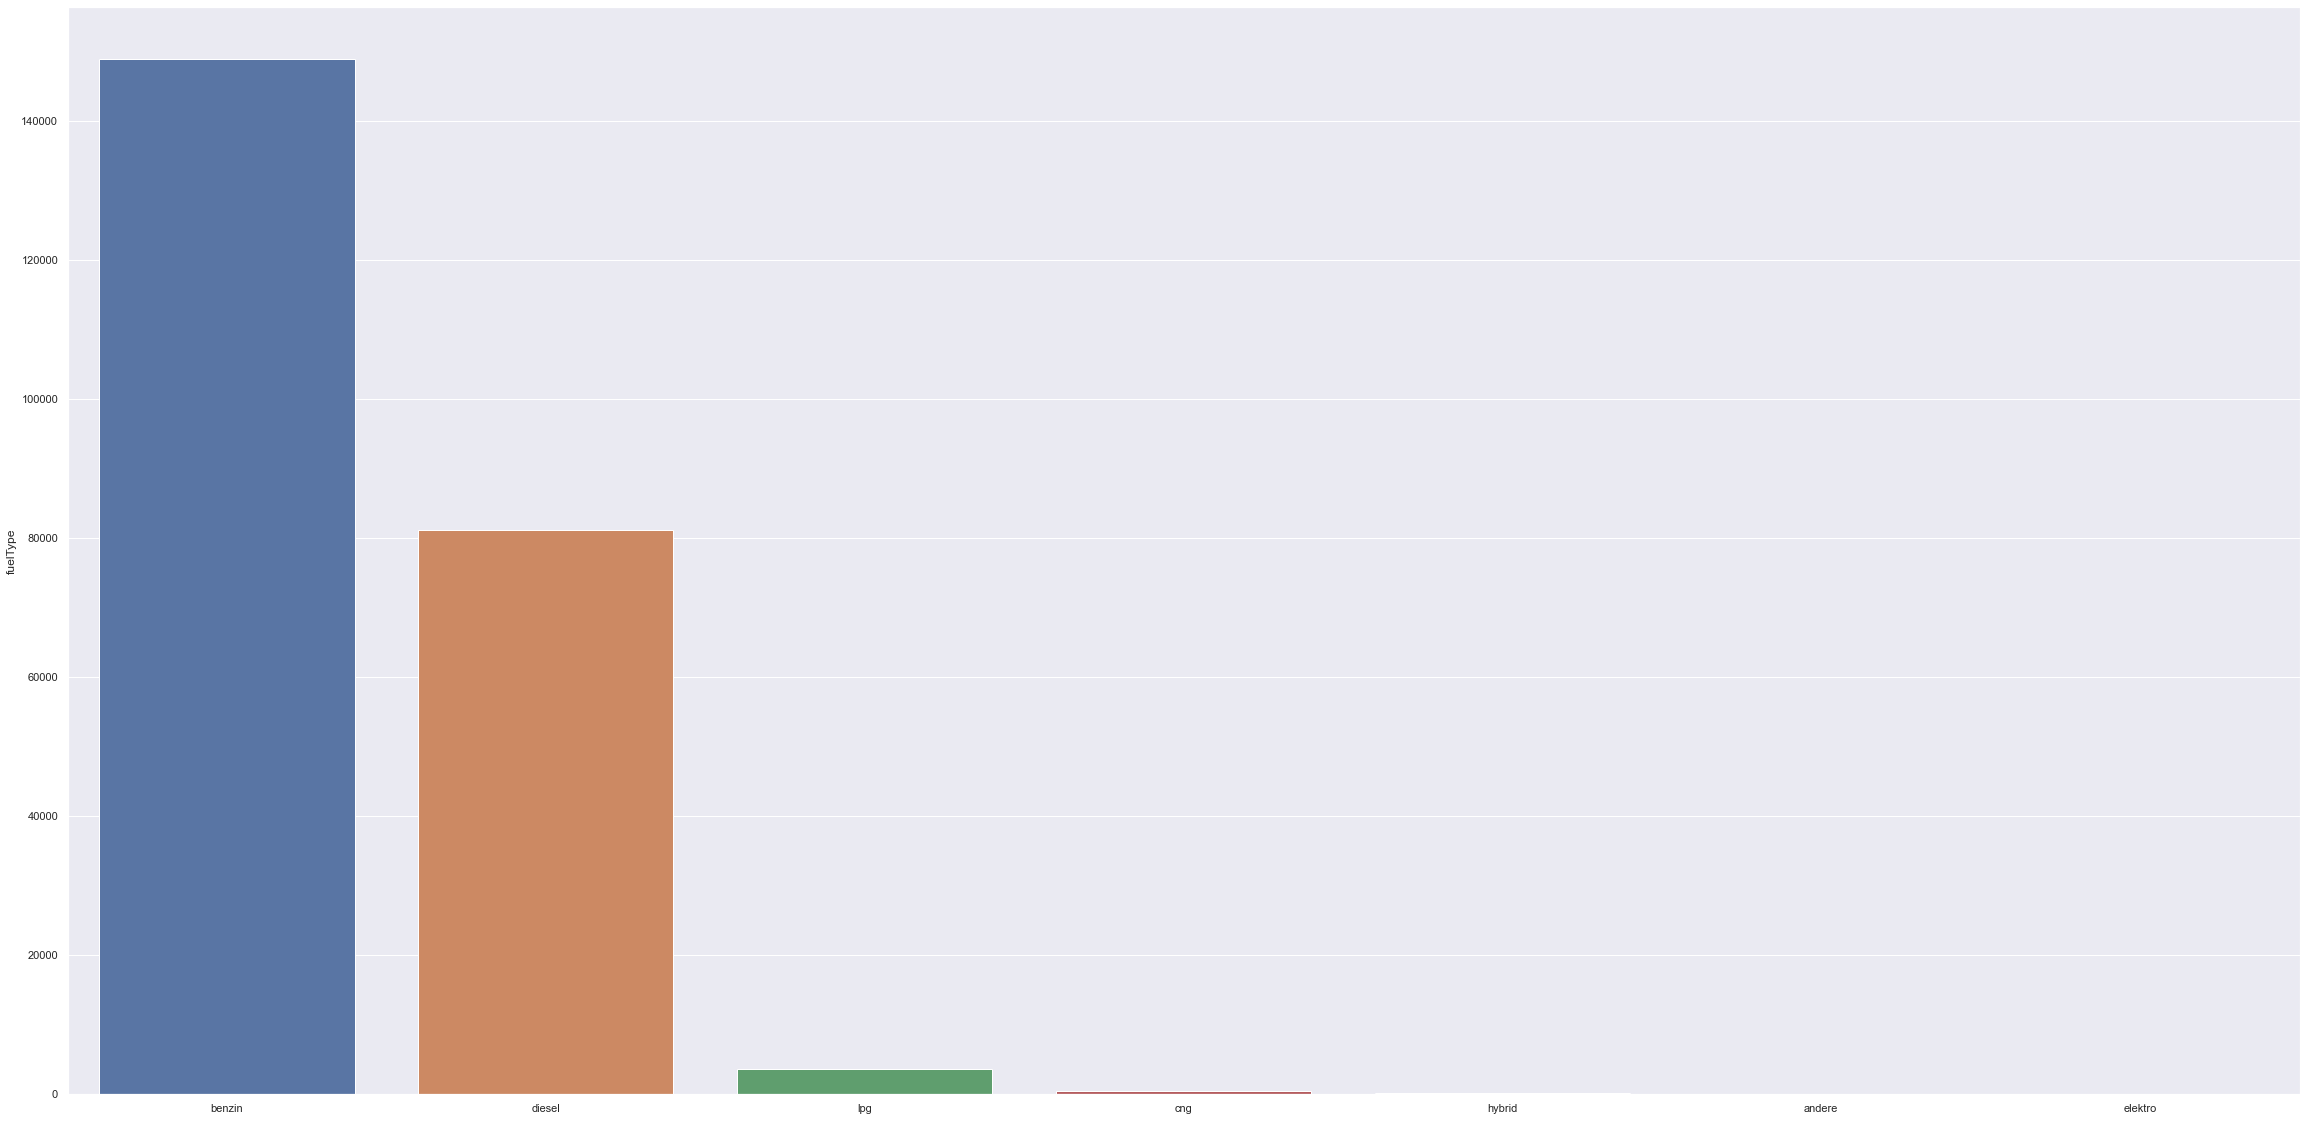

In [38]:
sns.barplot(data['fuelType'].value_counts().index, data['fuelType'].value_counts())

In [39]:
condition = data[
    ((data['fuelType'] == 'andere') | 
     (data['fuelType'] == 'elektro'))
]
data = data.drop(condition.index) # удалим редкие категории

In [40]:
data['fuelType'].value_counts()

benzin    148981
diesel     81196
lpg         3613
cng          421
hybrid       190
Name: fuelType, dtype: int64

In [41]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [42]:
data['notRepairedDamage'].value_counts() # бинарная классификация

nein    212343
ja       22058
Name: notRepairedDamage, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='notRepairedDamage'>

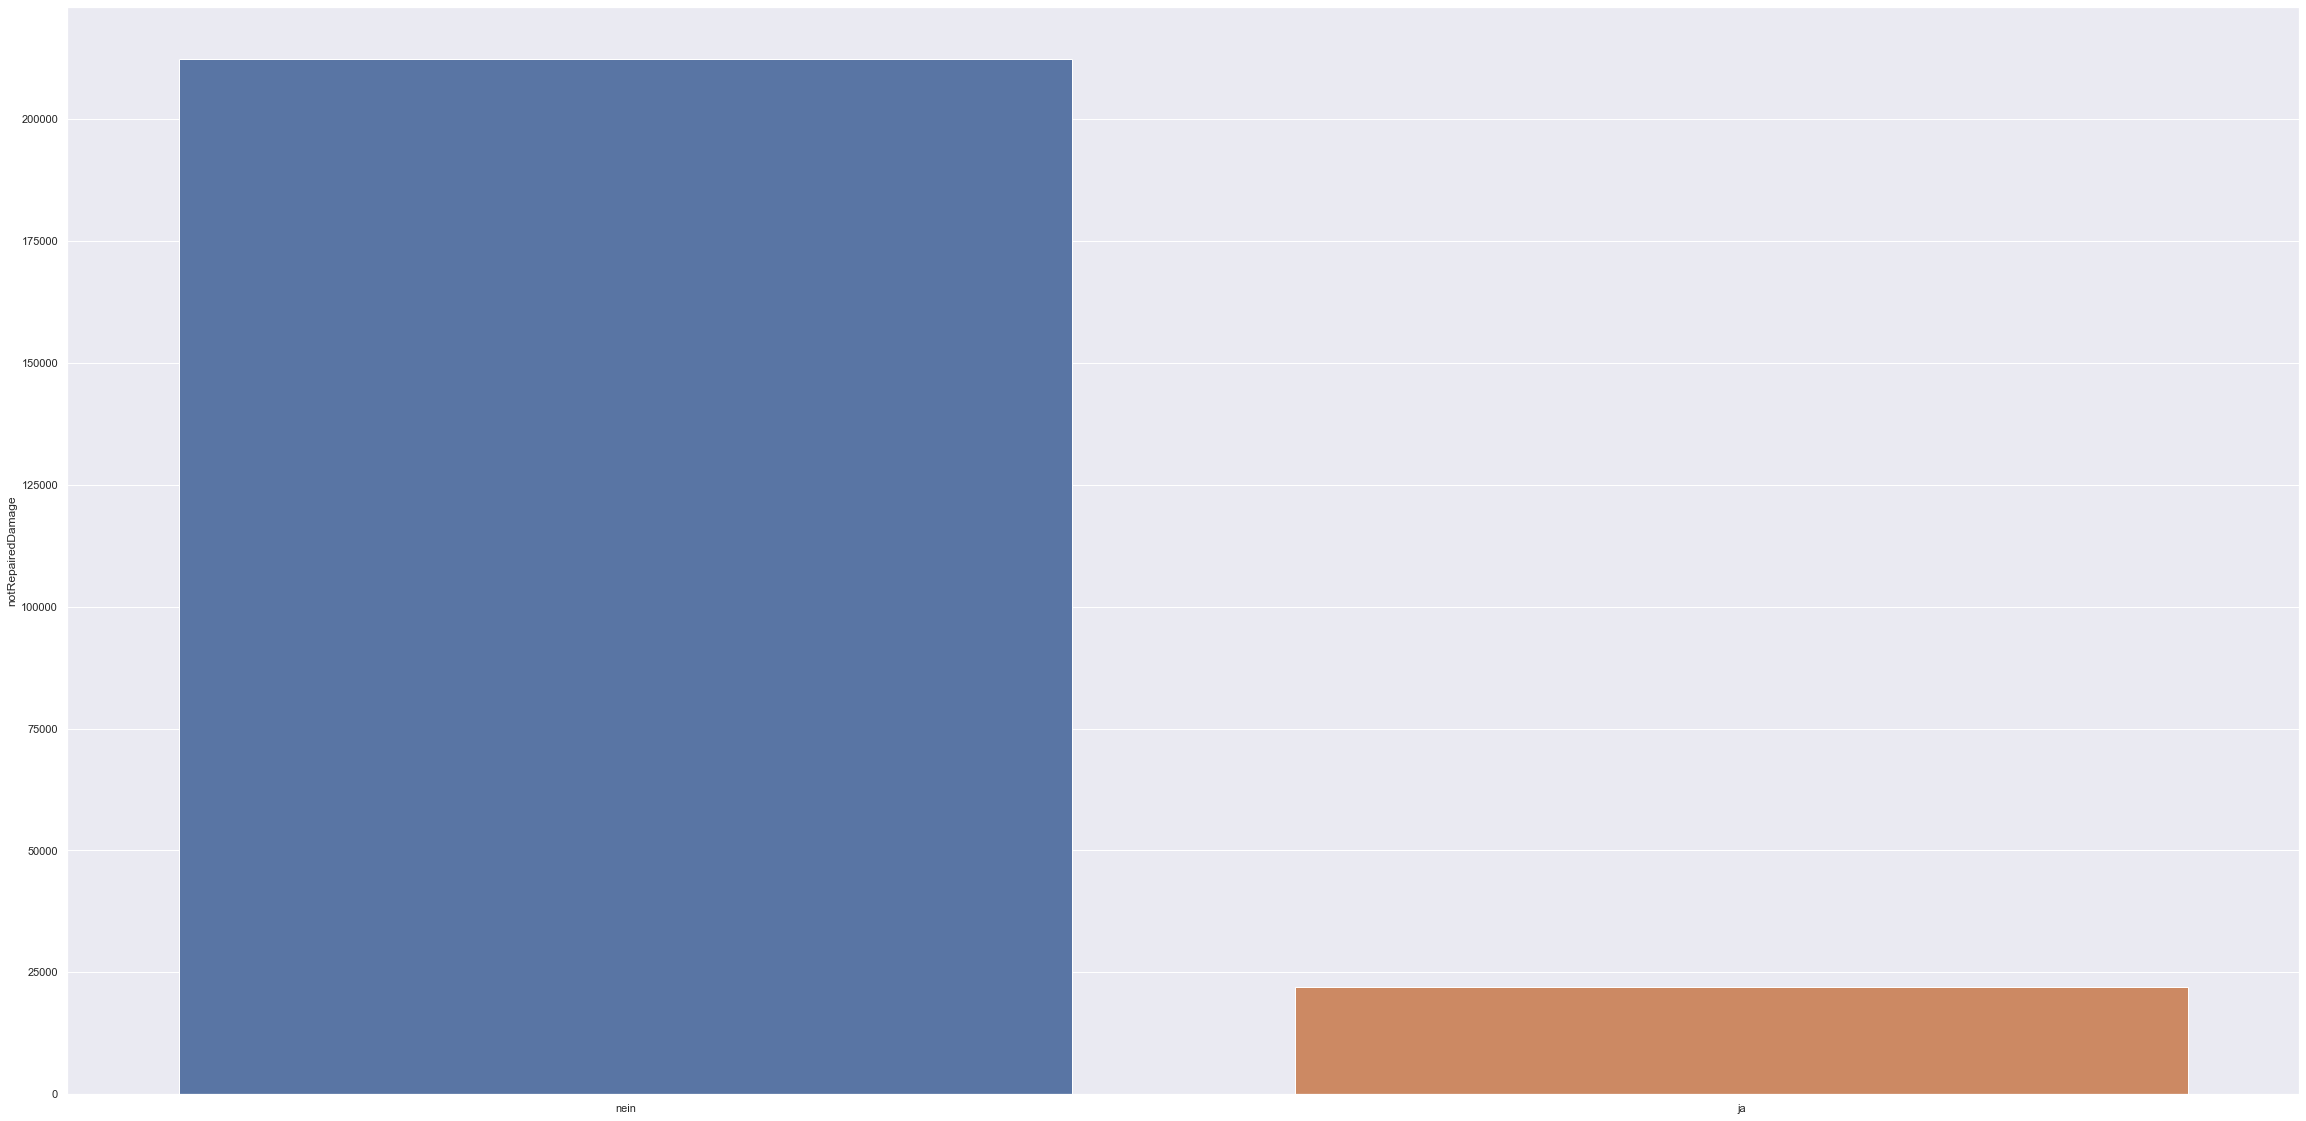

In [43]:
sns.barplot(data['notRepairedDamage'].value_counts().index, 
            data['notRepairedDamage'].value_counts())

<AxesSubplot:xlabel='notRepairedDamage', ylabel='log_price'>

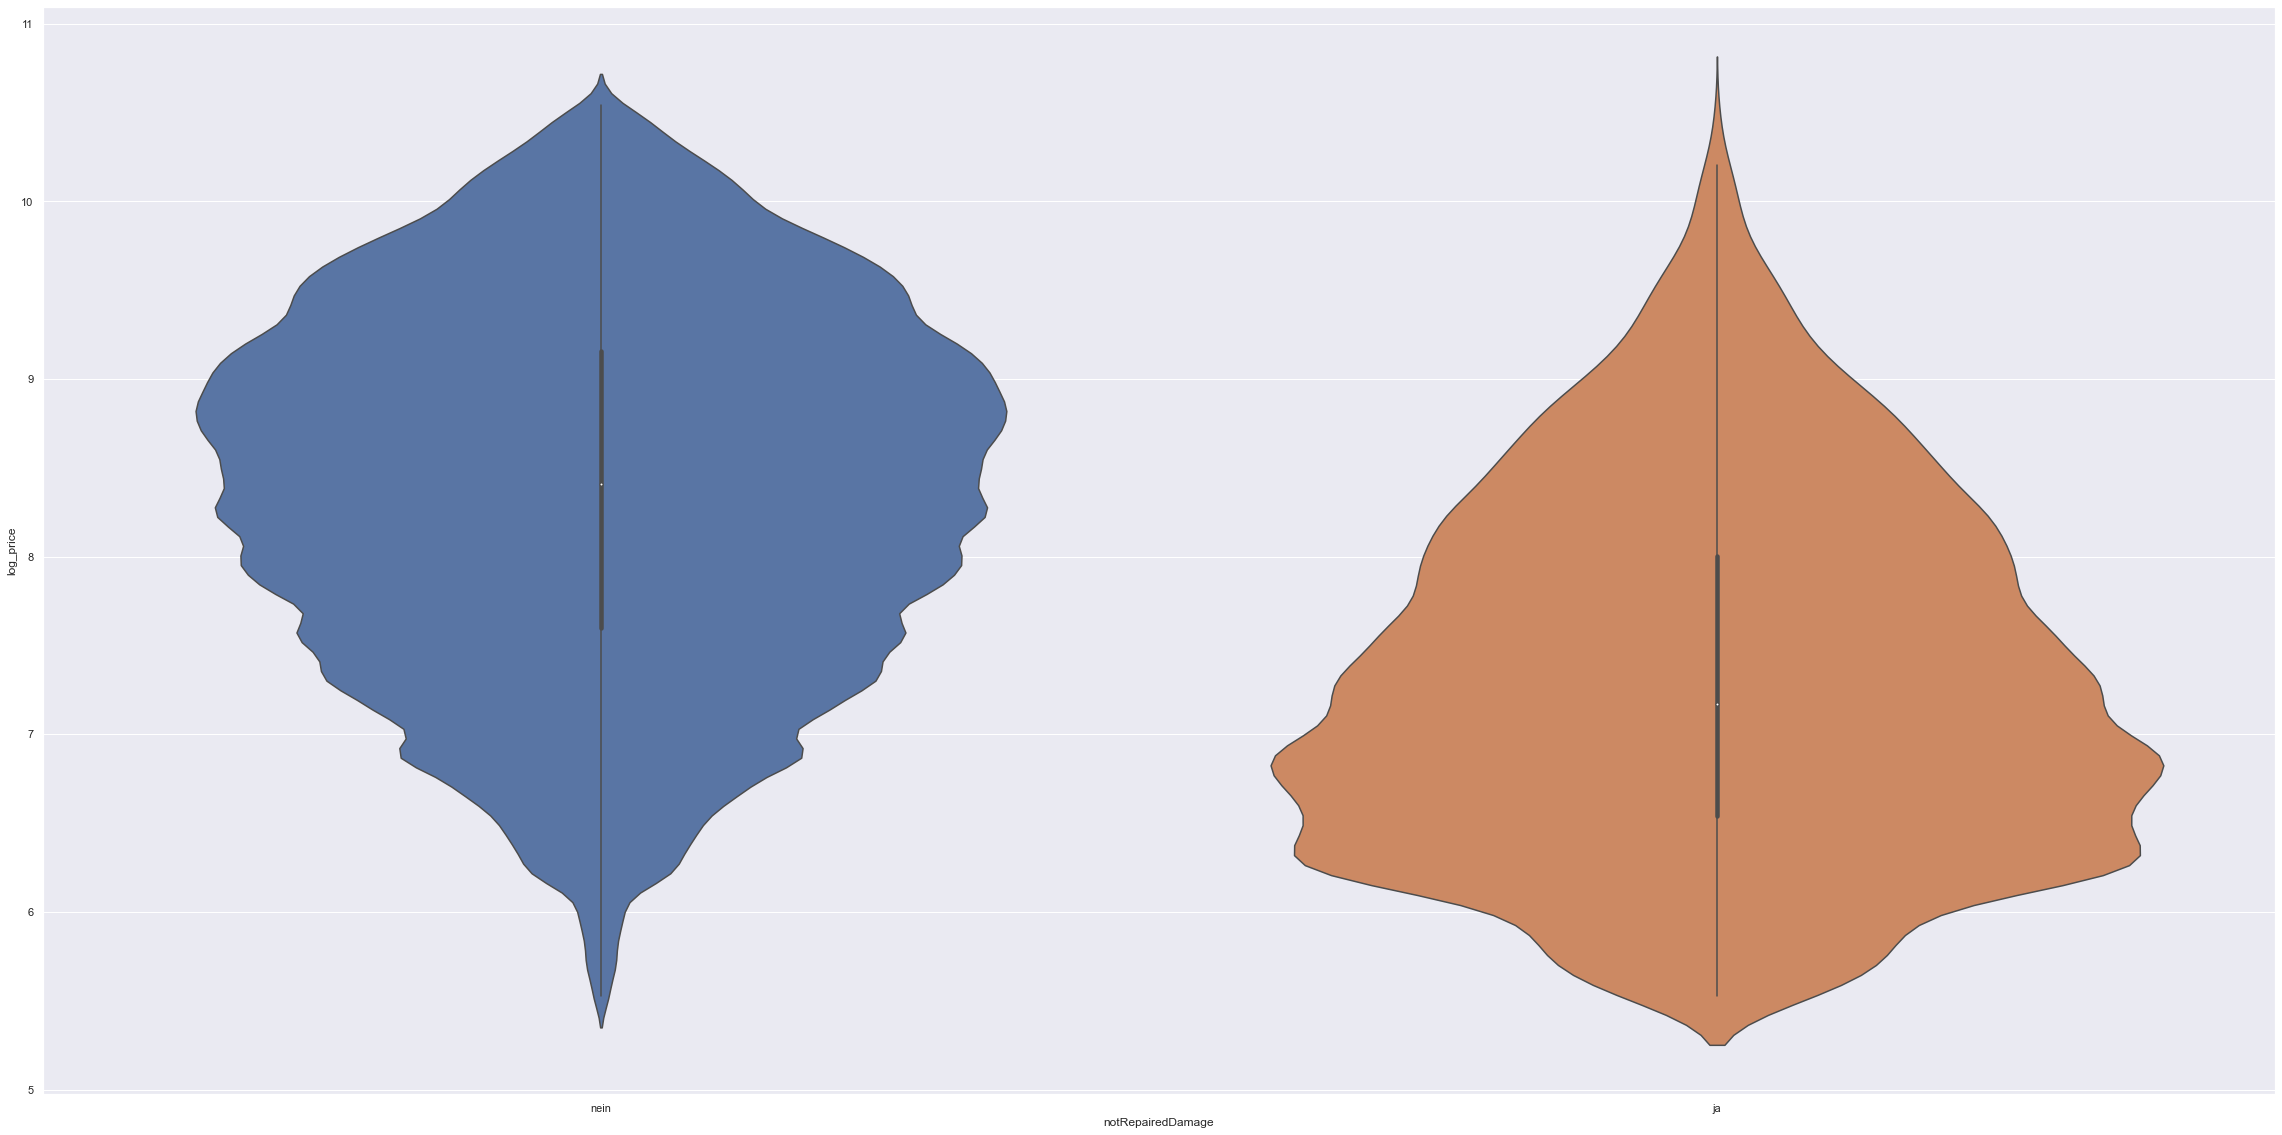

In [44]:
sns.violinplot(x='notRepairedDamage', y='log_price', data=data)


In [45]:
data['powerPS'].value_counts() # оставим как численный признак, видим выбросы!

75     15598
150    11422
140    10904
60      9941
101     9551
       ...  
332        1
540        1
475        1
362        1
473        1
Name: powerPS, Length: 386, dtype: int64

In [46]:
data['powerPS'].value_counts()[data['powerPS'].value_counts() < 100] # будем считать, что это выбросы

292    97
108    96
450    93
271    93
79     93
       ..
332     1
540     1
475     1
362     1
473     1
Name: powerPS, Length: 249, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


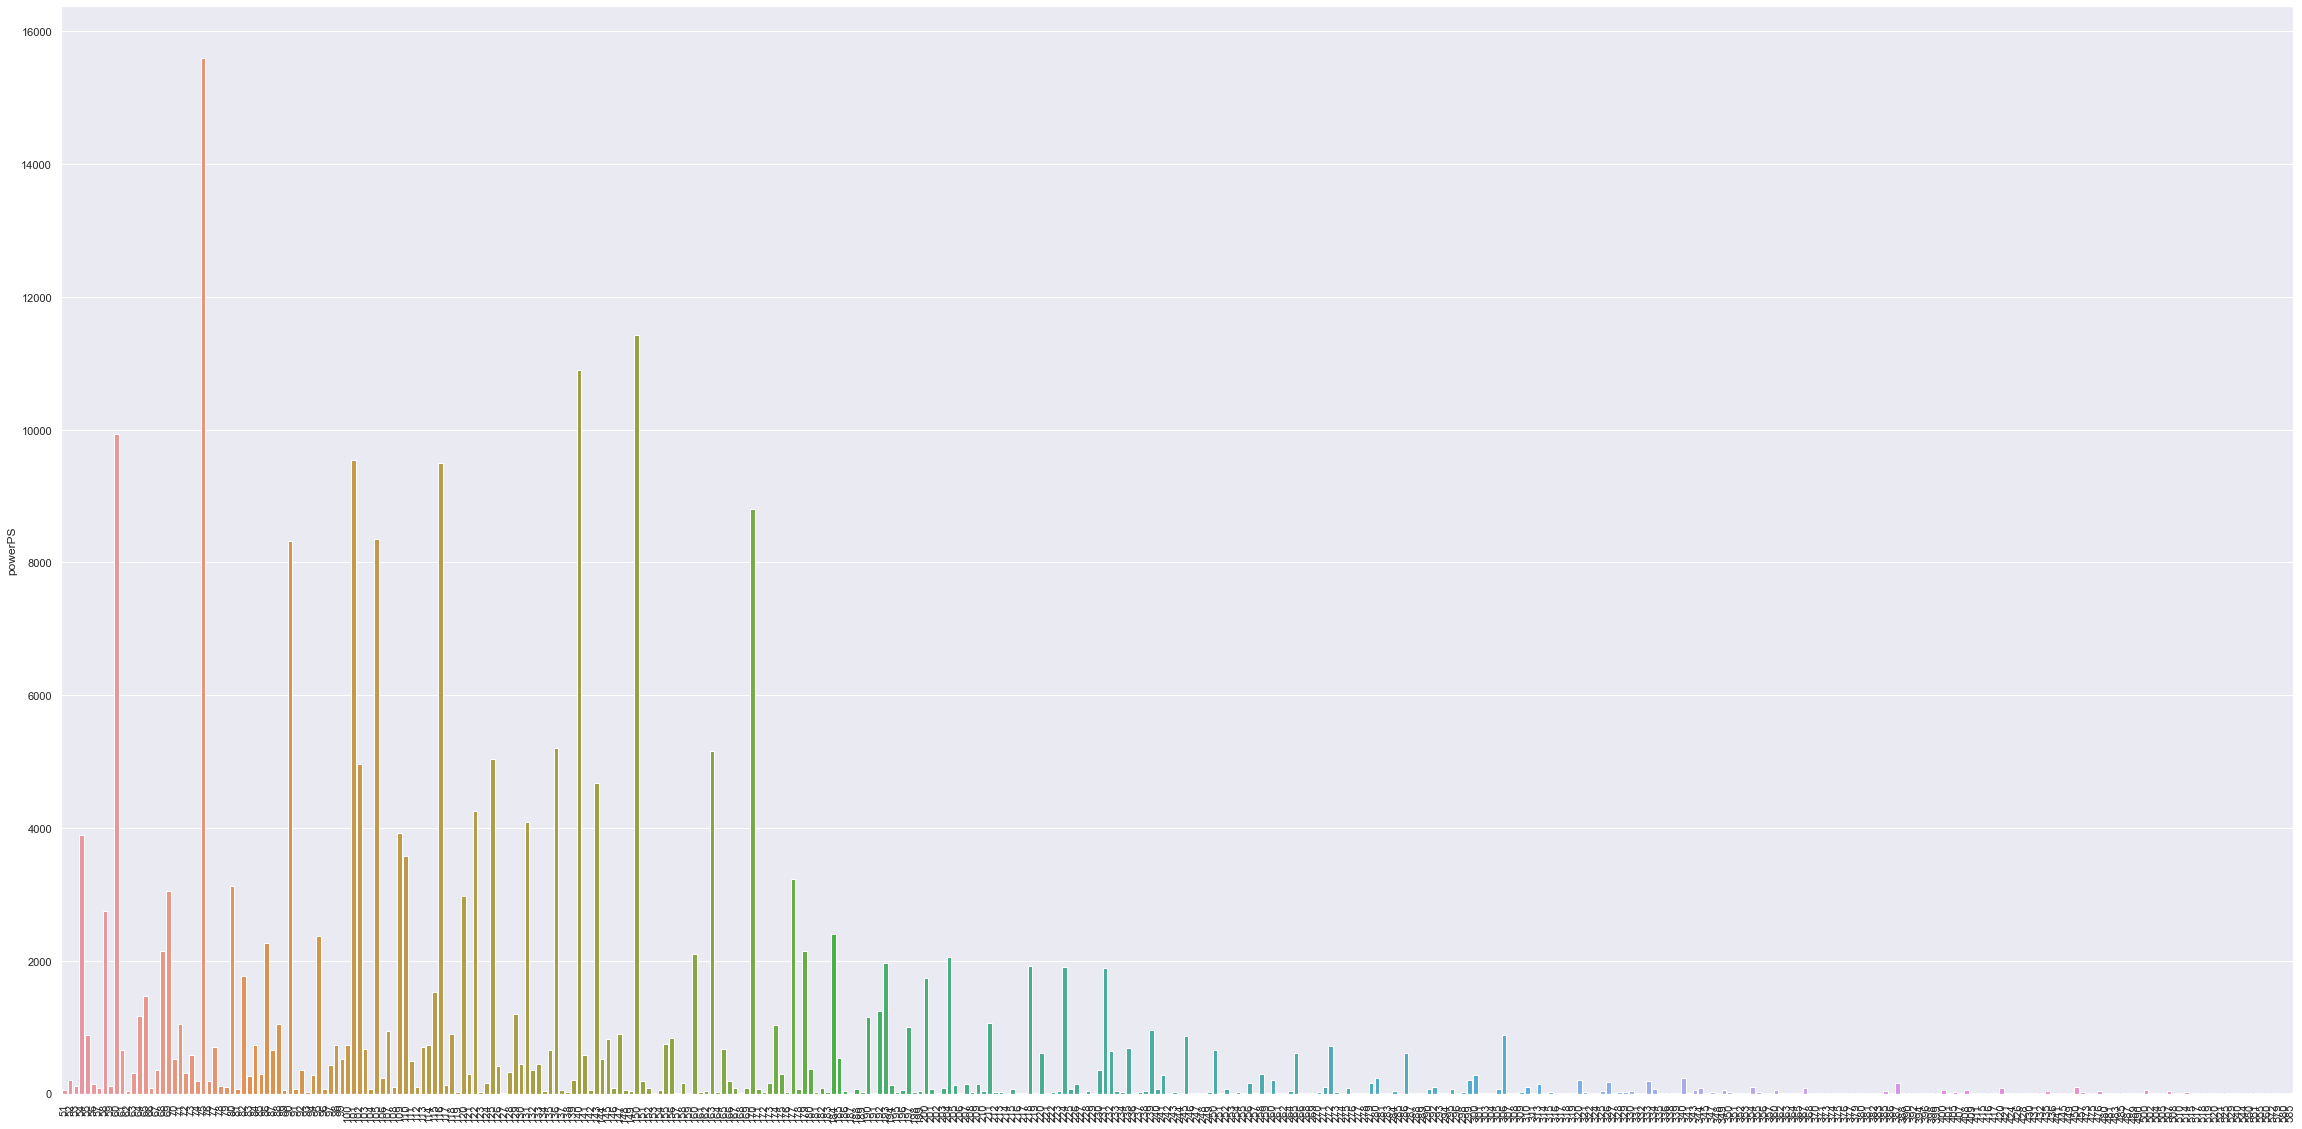

In [47]:
ax = sns.barplot(data['powerPS'].value_counts().index, 
            data['powerPS'].value_counts())
ax.tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='powerPS', ylabel='log_price'>

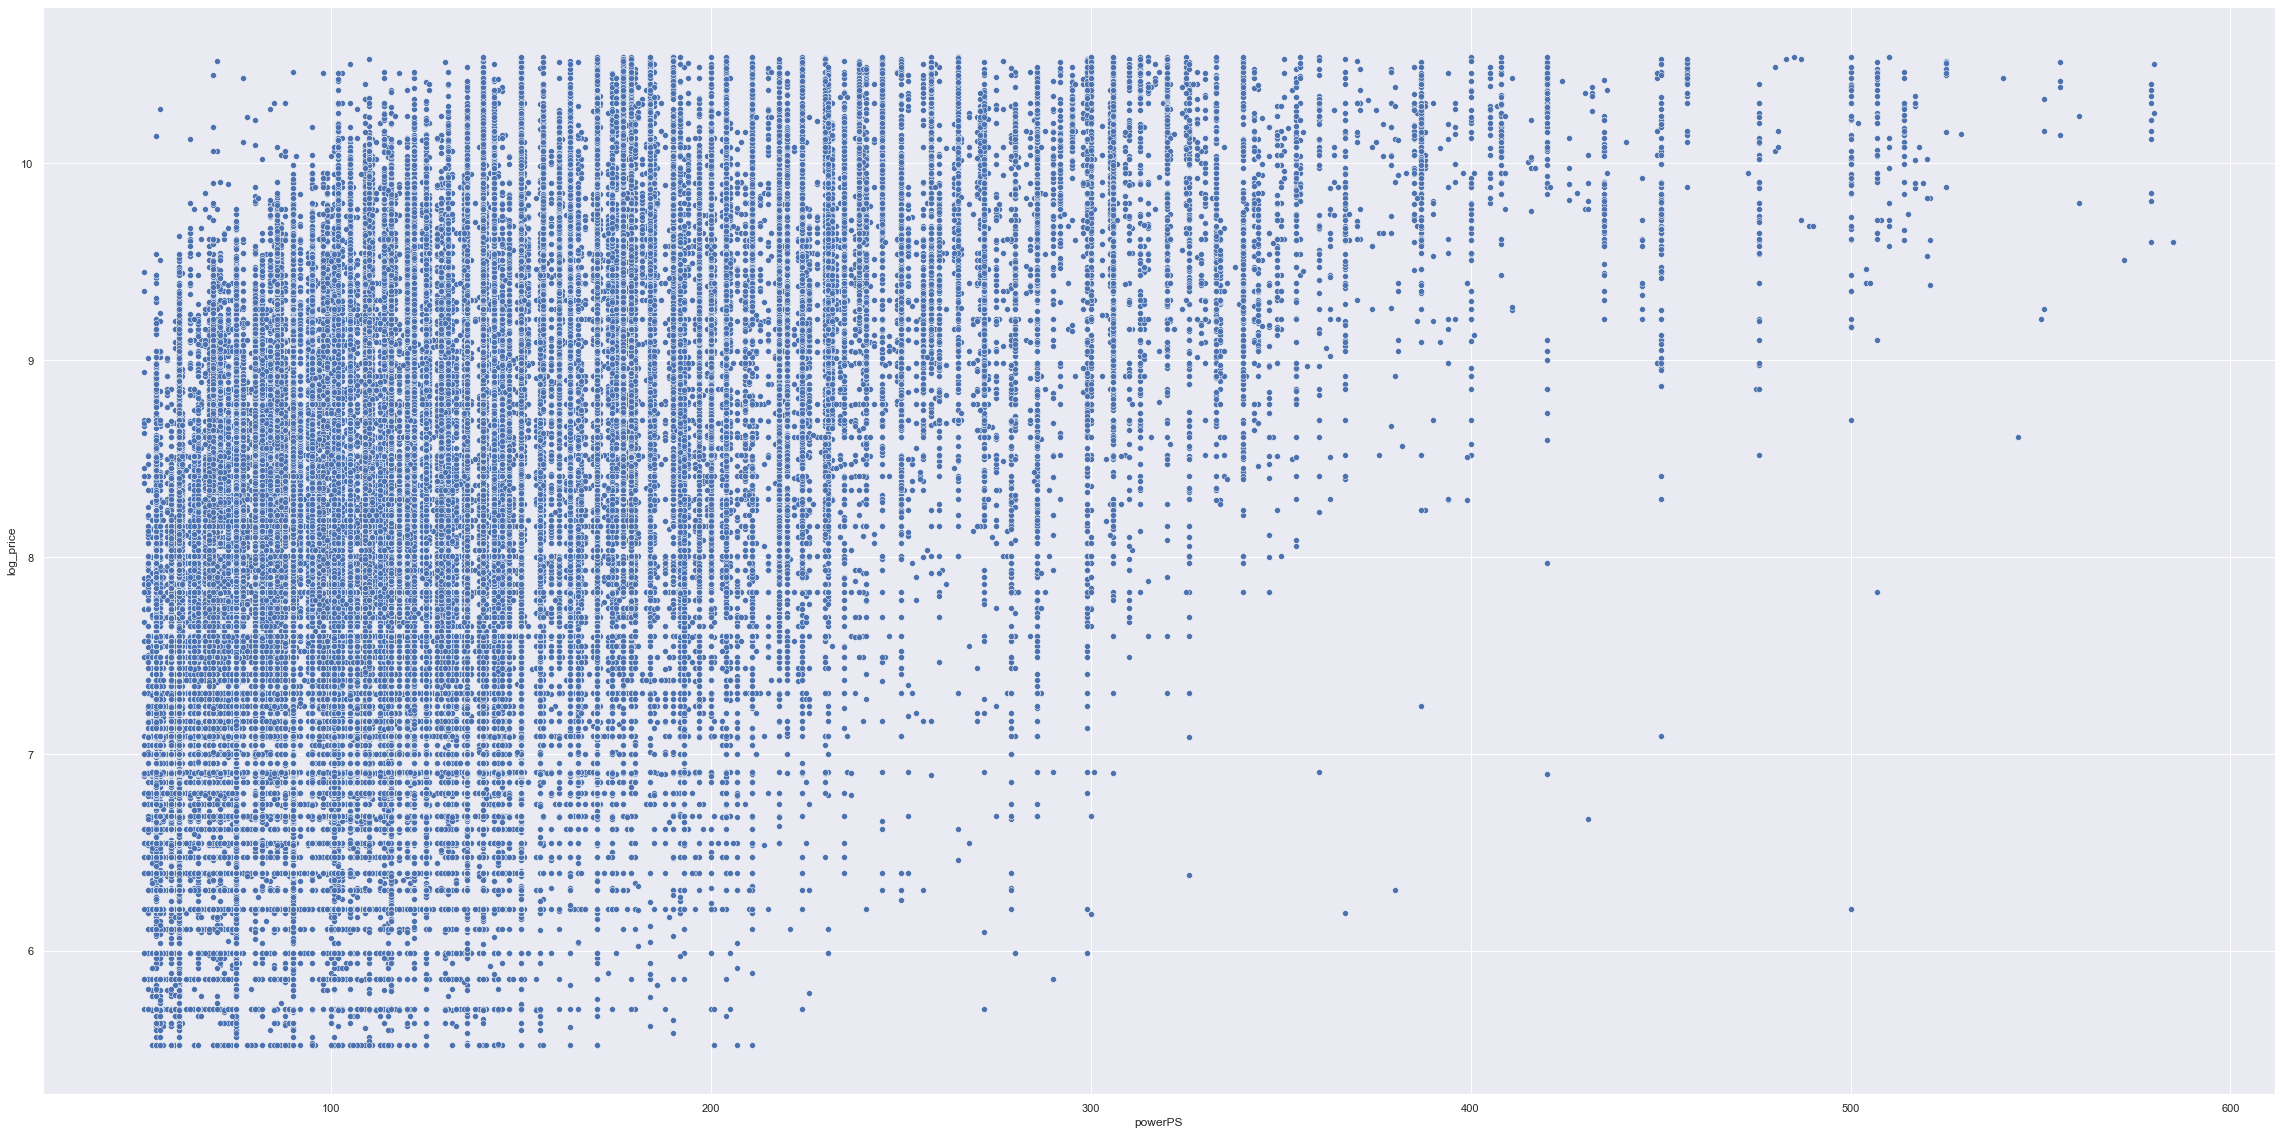

In [48]:
sns.scatterplot(x='powerPS', y='log_price', data=data)

In [49]:
condition = data['powerPS'].value_counts()[data['powerPS'].value_counts() < 100].index
for c in condition:
    data = data.drop(data[data['powerPS'] == c].index)

In [50]:
data['kilometer'].value_counts() # оставим численным

150000    141620
125000     25627
100000     10635
90000       8833
80000       7934
70000       7082
60000       6463
50000       5669
40000       4681
30000       4244
20000       3543
5000        1508
10000       1121
Name: kilometer, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


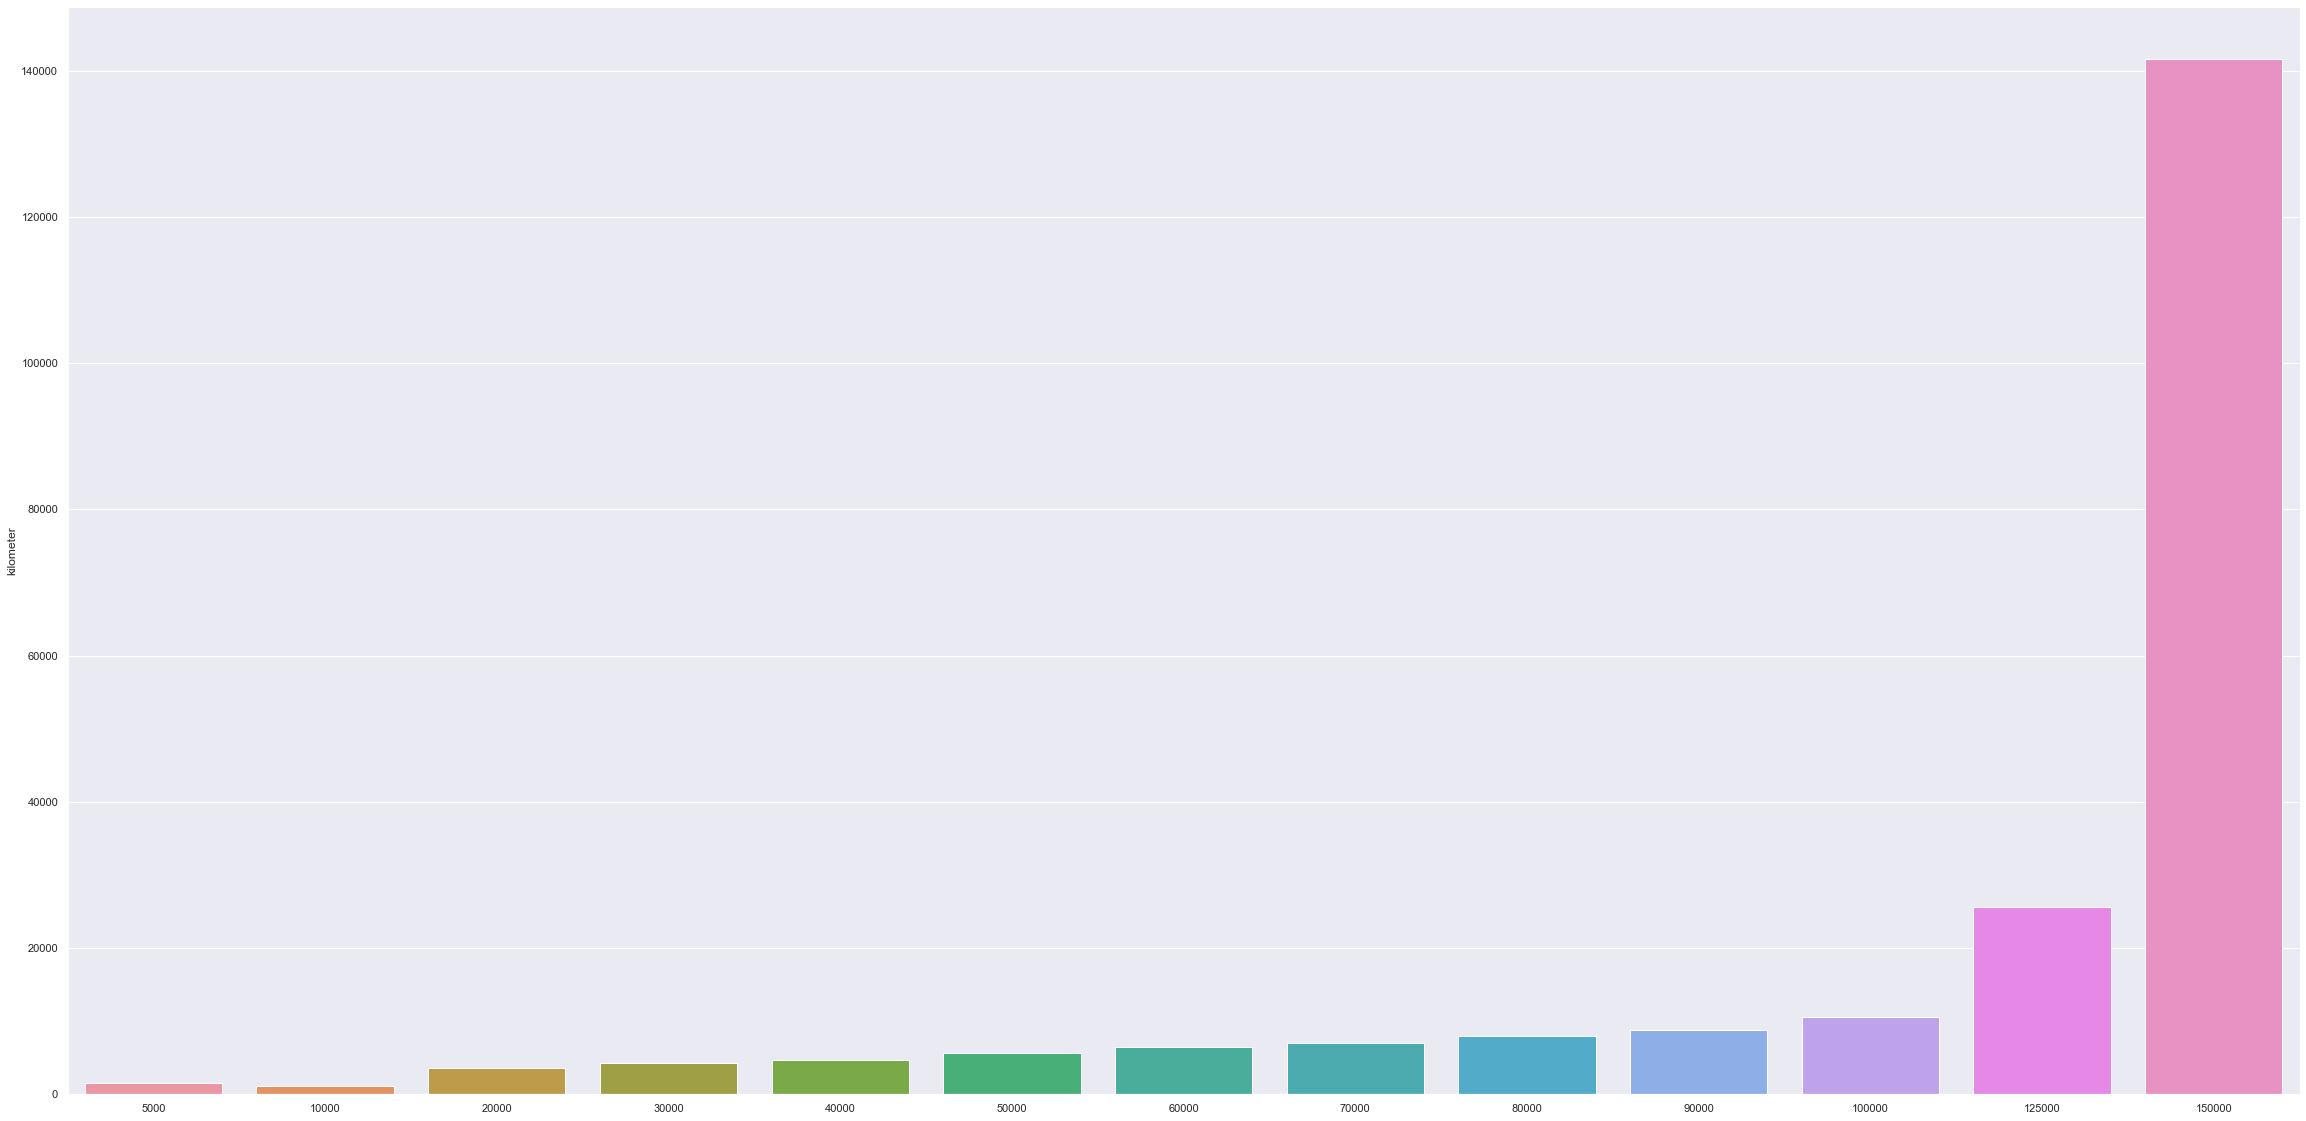

In [51]:
ax = sns.barplot(data['kilometer'].value_counts().index, 
            data['kilometer'].value_counts()) 

<AxesSubplot:xlabel='kilometer', ylabel='log_price'>

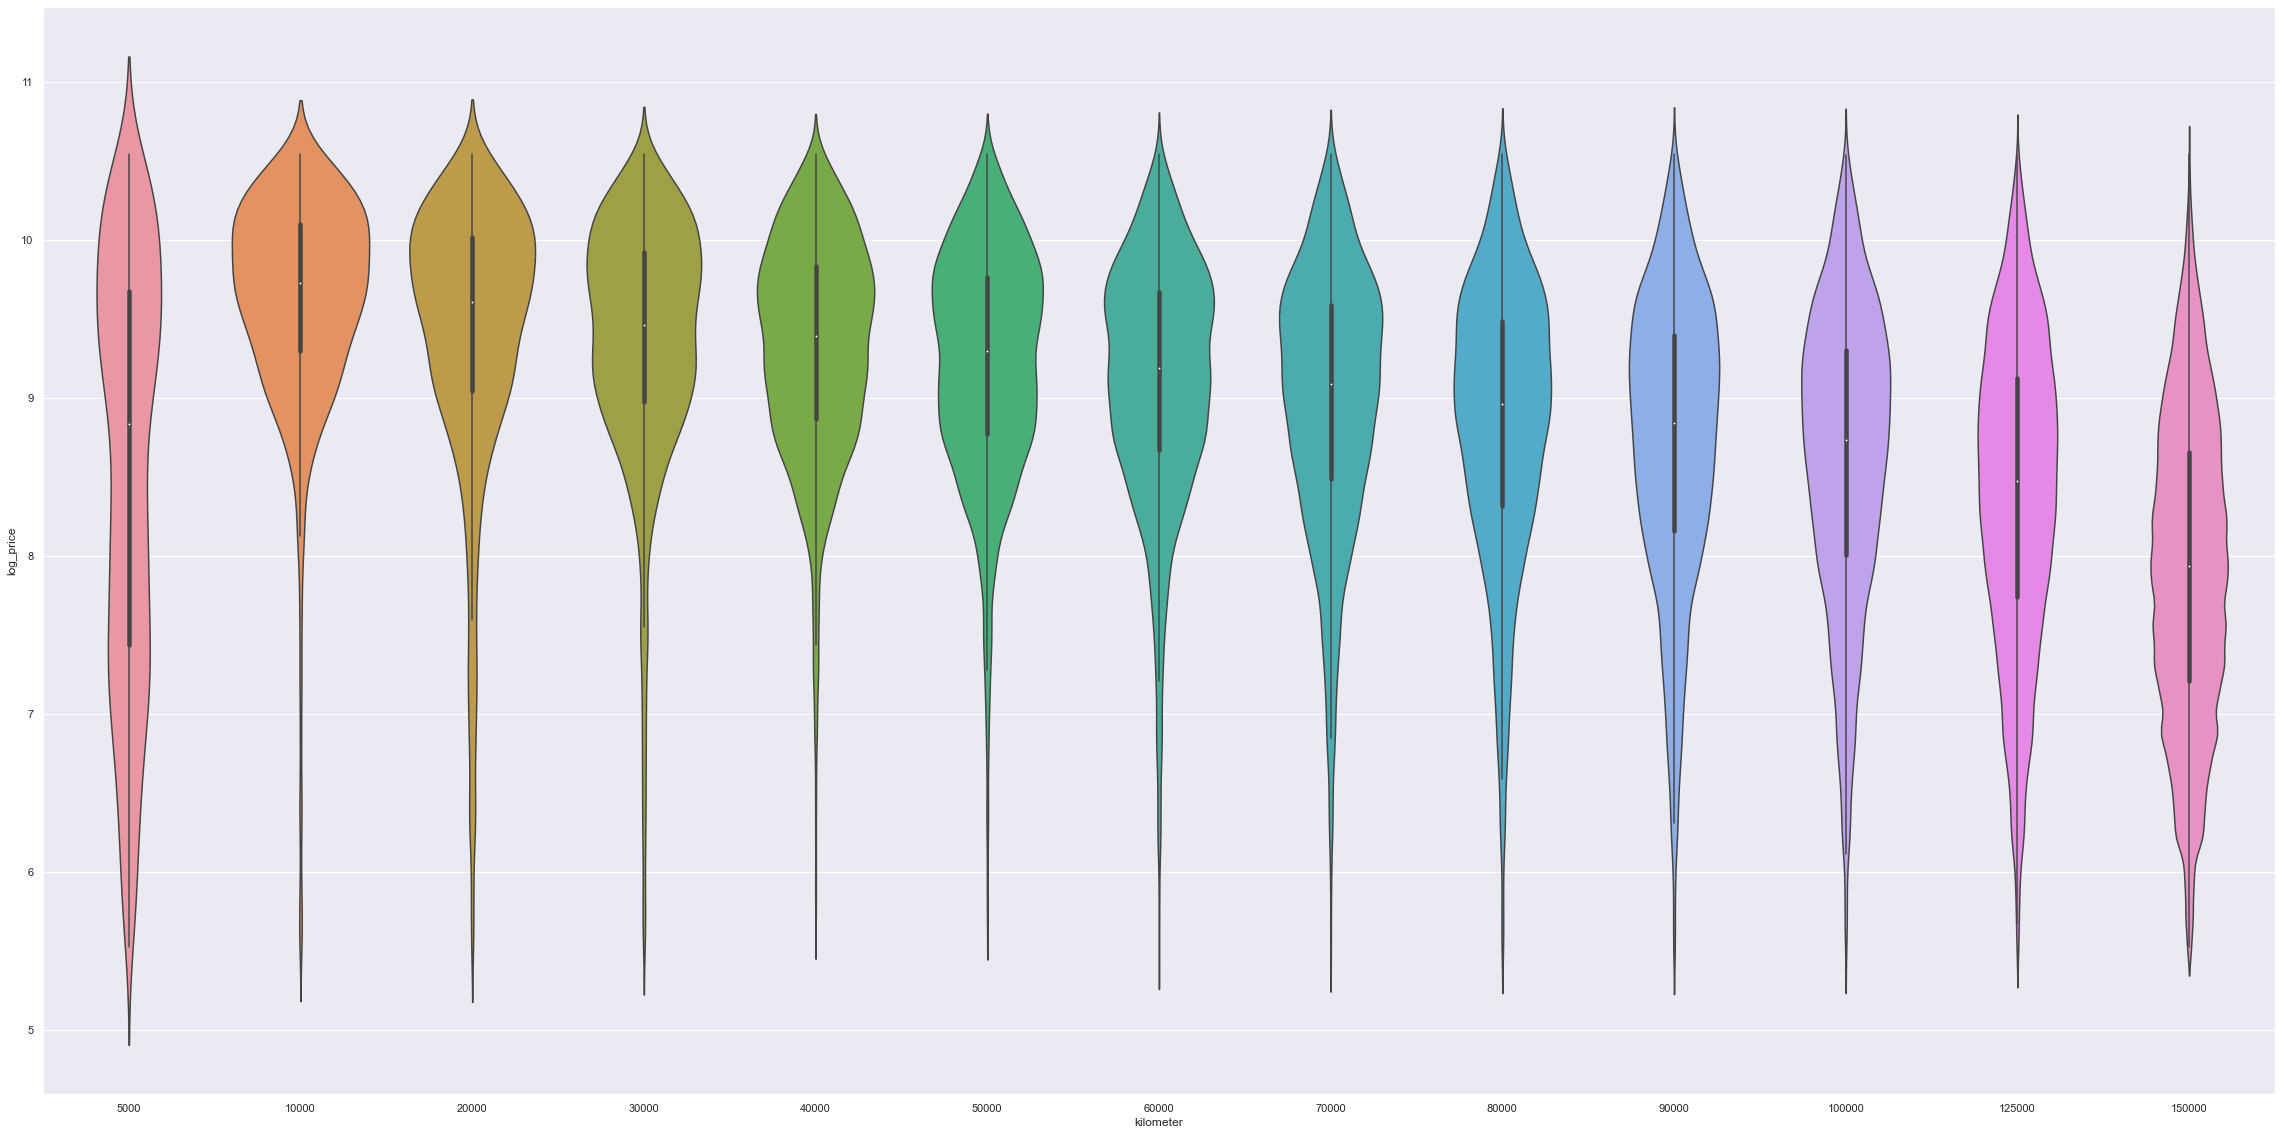

In [52]:
sns.violinplot(x='kilometer', y='log_price', data=data)
# объединим 5000 с 125000, 10000 с 20000

In [53]:
condition = data[
    ((data['kilometer'] == 5000) | 
     (data['kilometer'] == 125000))
]
data = data.drop(condition.index) # удалим редкие категории

In [54]:
data['autoAgeMonths'].value_counts() # численный

156    1384
118    1373
120    1299
130    1292
144    1279
       ... 
560       1
551       1
533       1
491       1
470       1
Name: autoAgeMonths, Length: 590, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


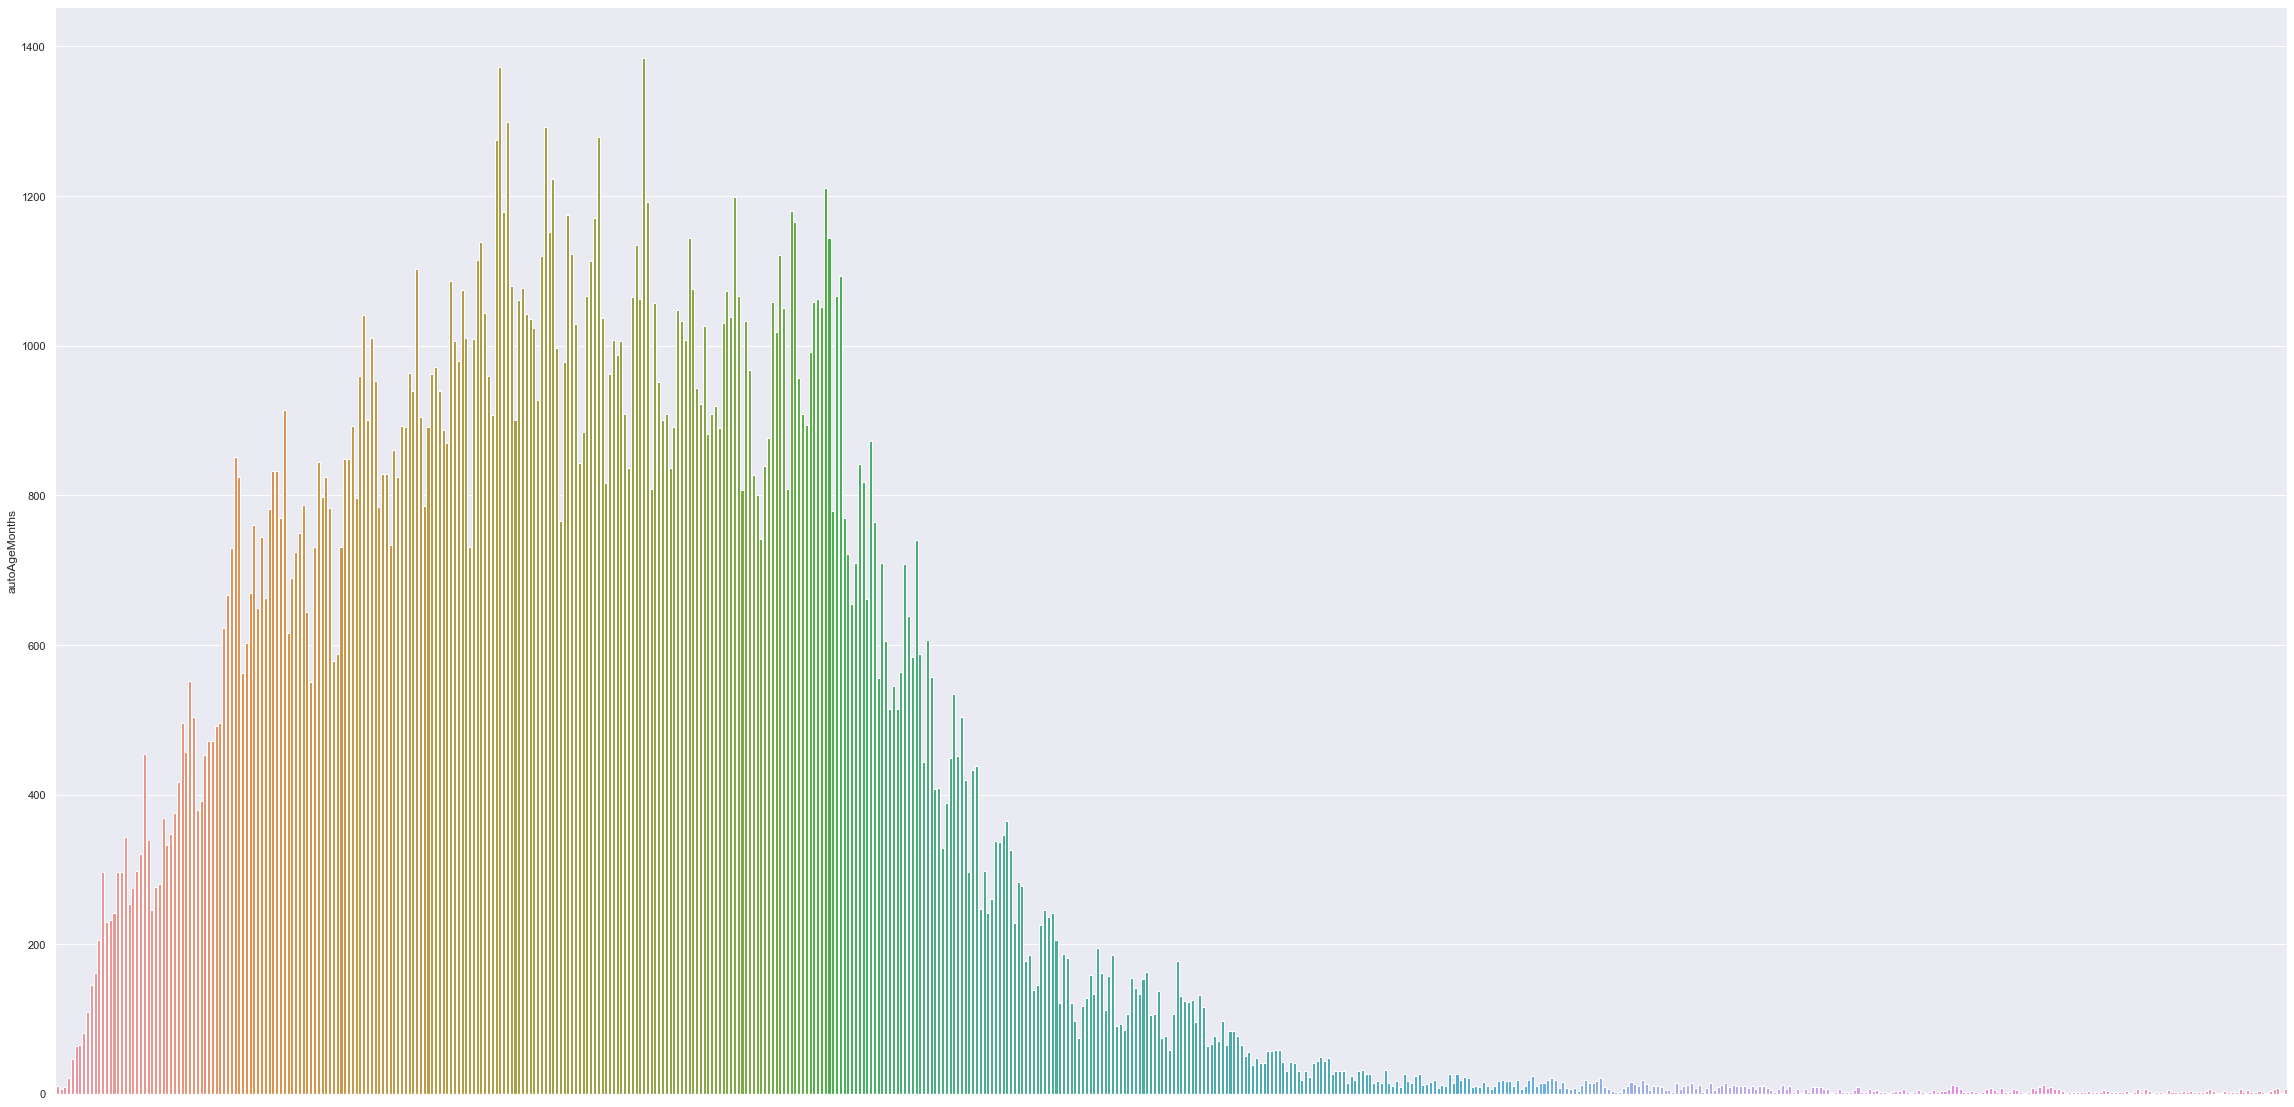

In [55]:
ax = sns.barplot(data['autoAgeMonths'].value_counts().index, 
            data['autoAgeMonths'].value_counts()) # видим тяжелый правый хвост
plt.tick_params(
    axis='x',          
    which='both',      
    labelbottom=False)

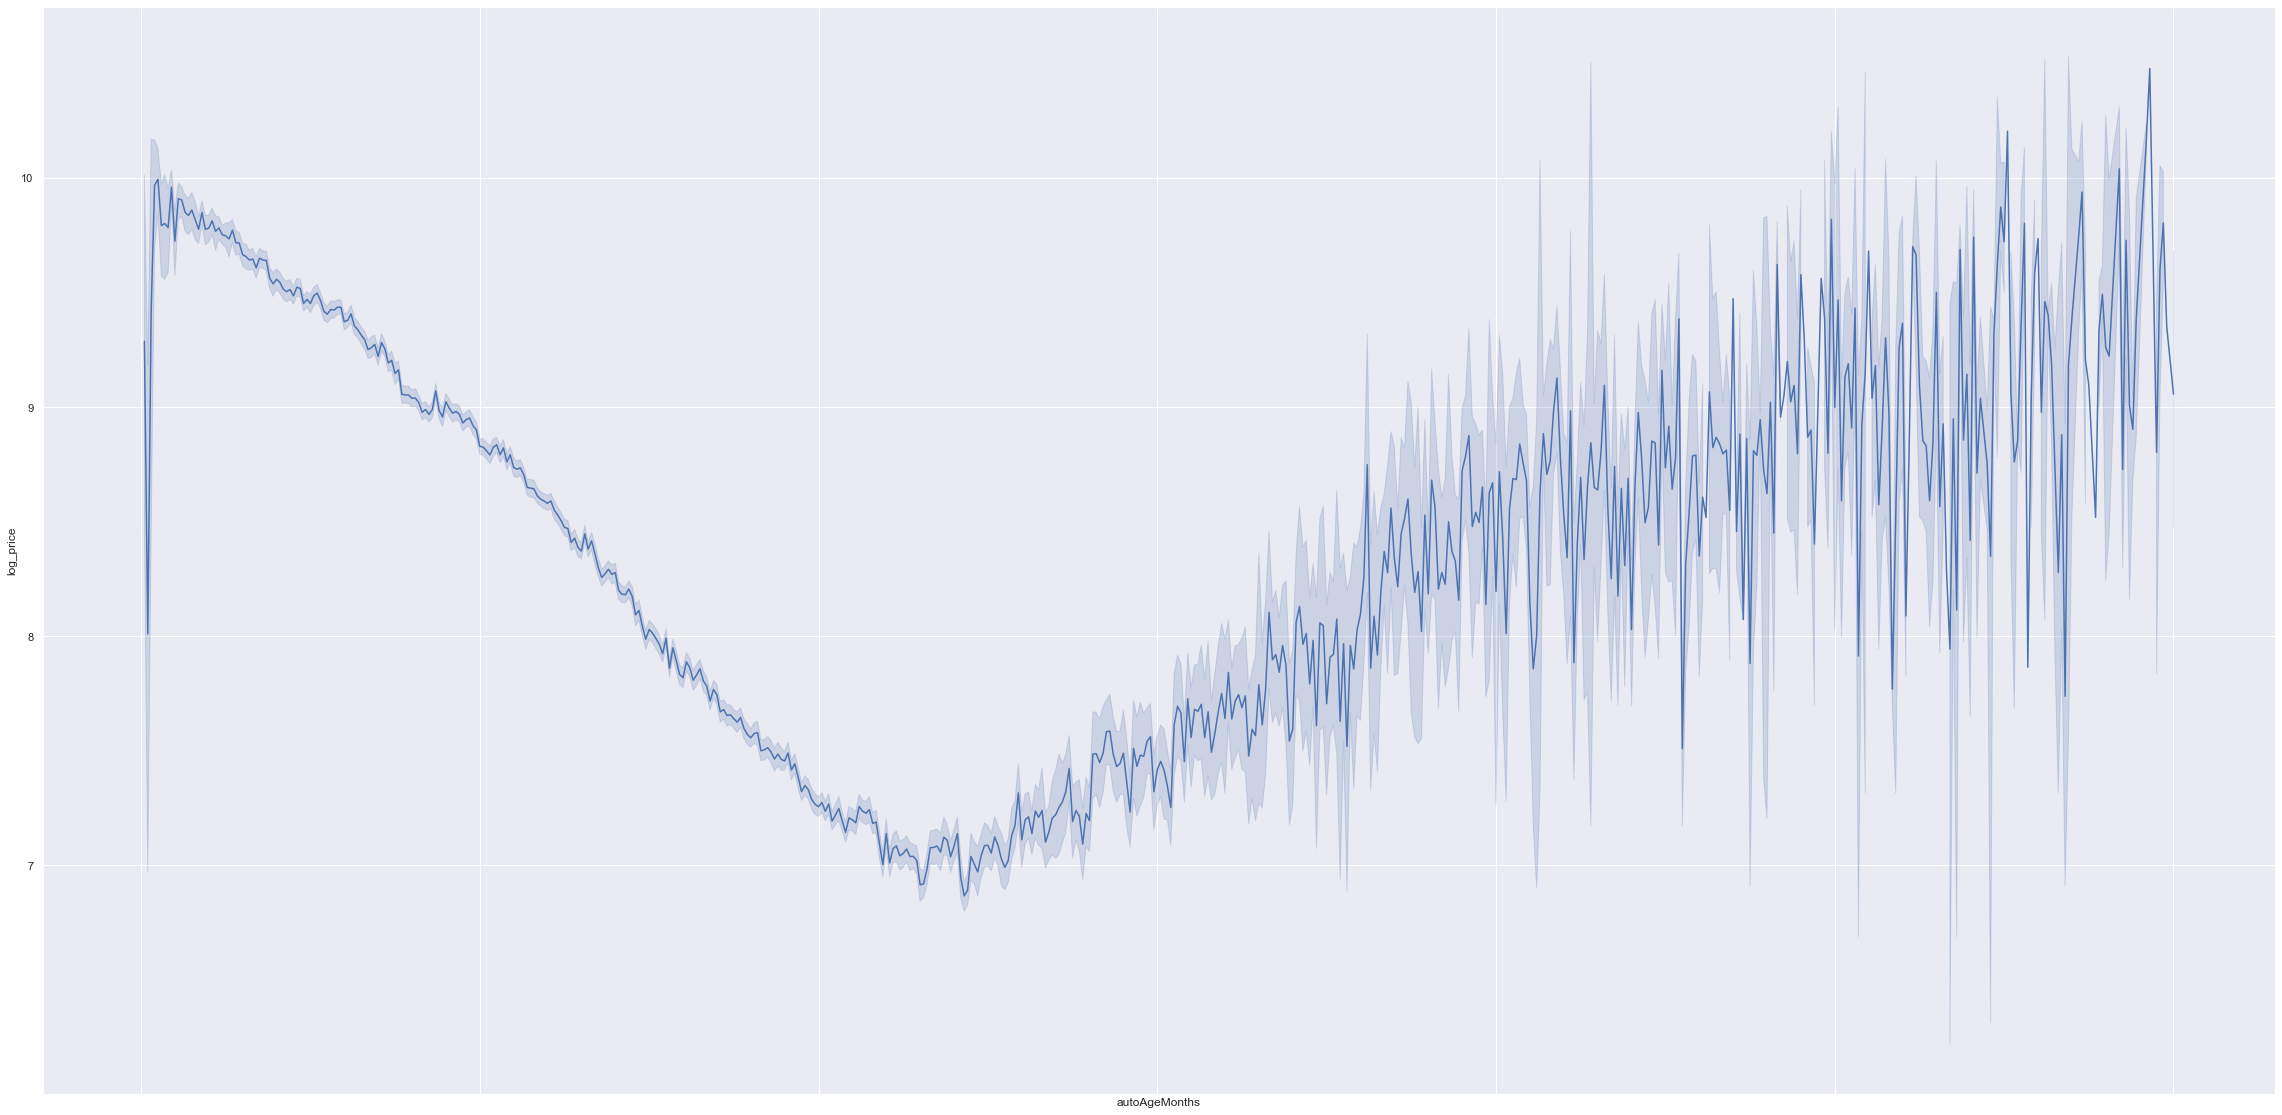

In [56]:
sns.lineplot(x='autoAgeMonths', y='log_price', data=data)
plt.tick_params(
    axis='x',          # уберем нижние цифры в графике, чтобы не было черной полосы
    which='both',      
    labelbottom=False)

In [57]:
data['autoAgeMonths'].value_counts()[data['autoAgeMonths'].value_counts() < 100]

309    97
270    97
302    96
282    93
281    90
       ..
560     1
551     1
533     1
491     1
470     1
Name: autoAgeMonths, Length: 303, dtype: int64

In [58]:
condition = data['autoAgeMonths'].value_counts()[data['autoAgeMonths'].value_counts() < 100].index
for c in condition:
    data = data.drop(data[data['autoAgeMonths'] == c].index)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


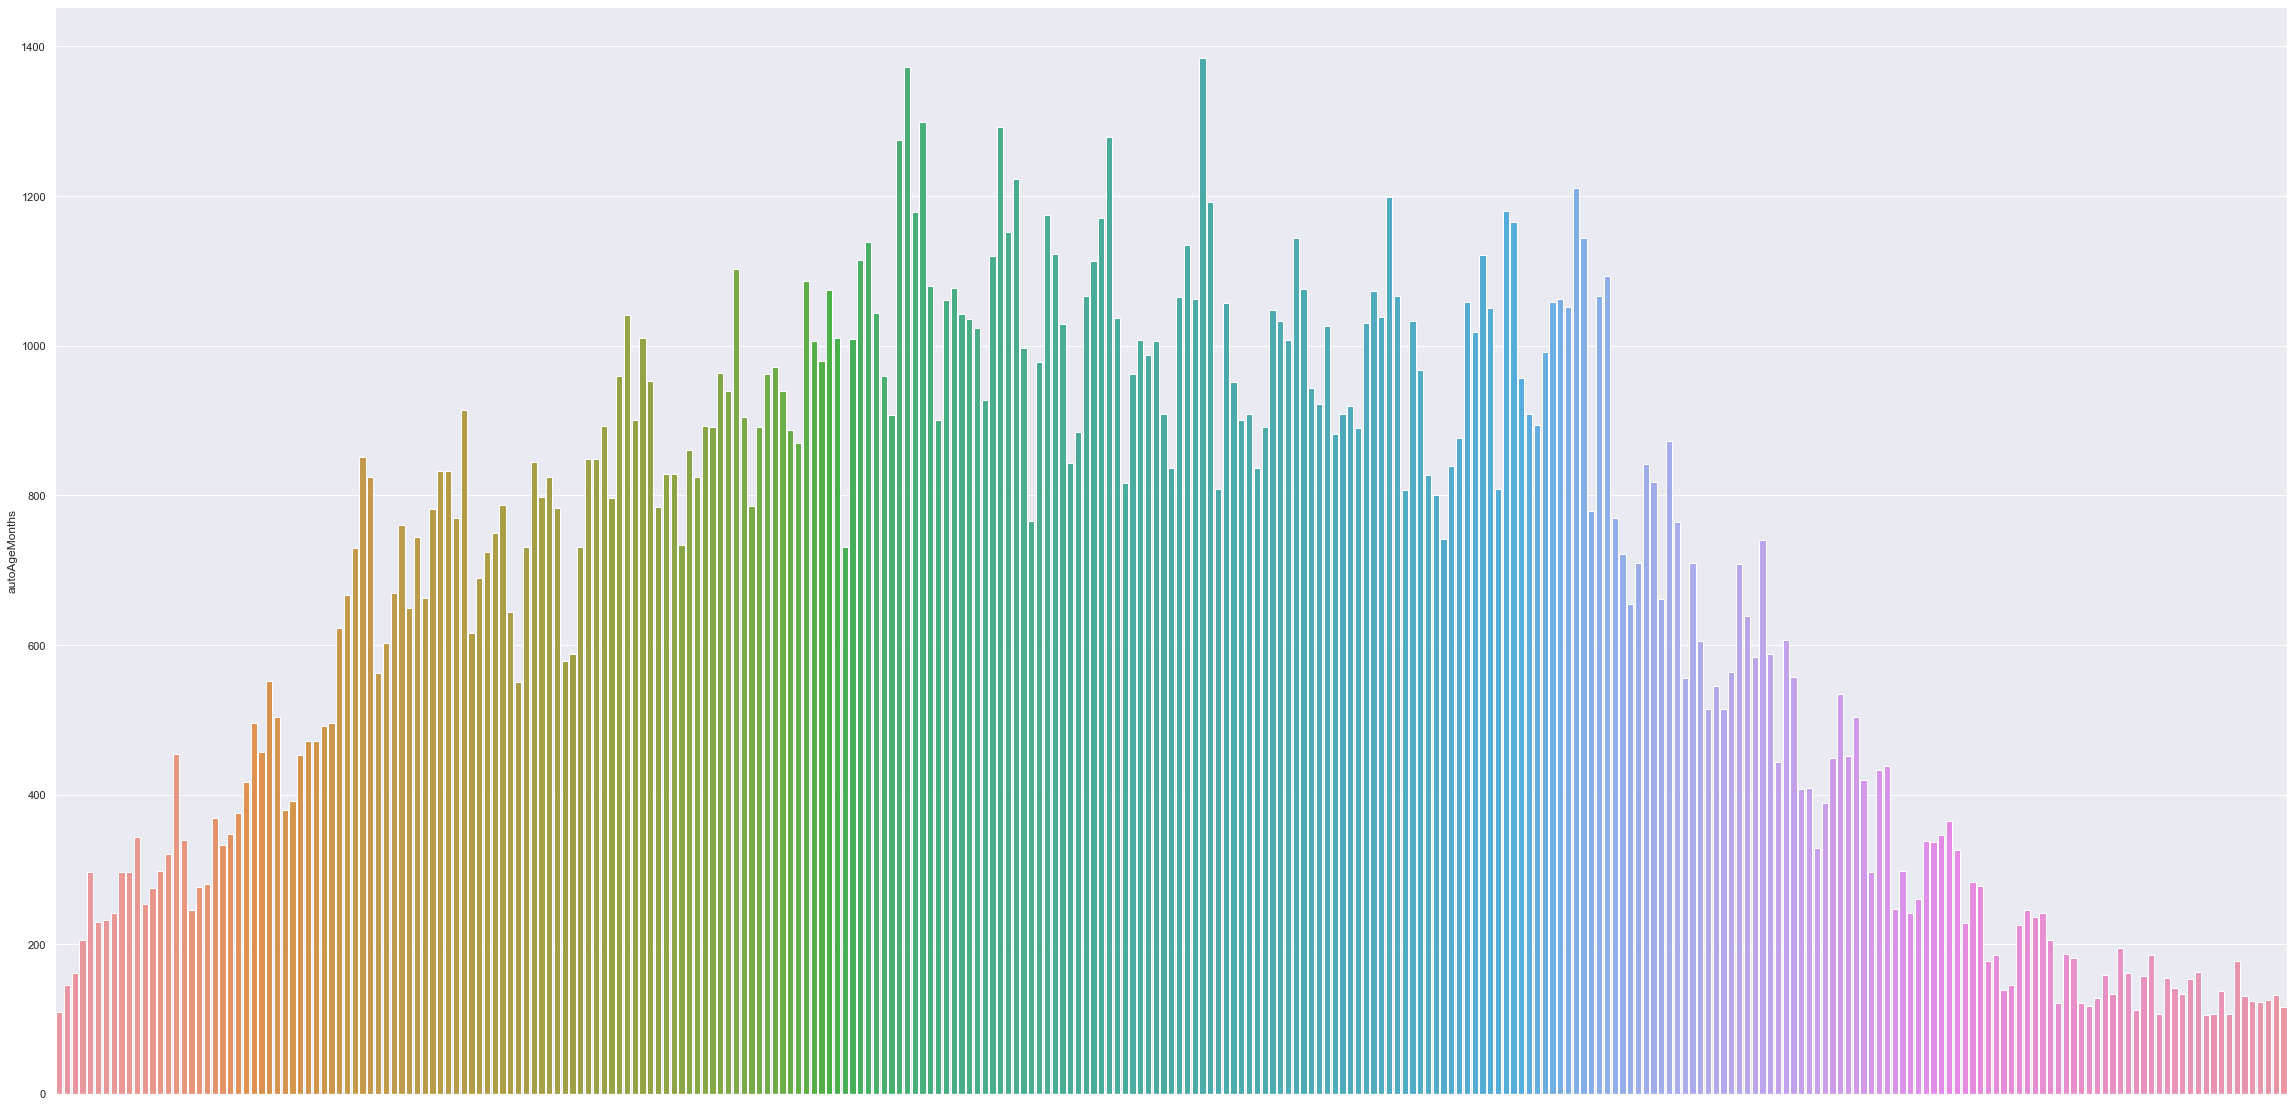

In [59]:
ax = sns.barplot(data['autoAgeMonths'].value_counts().index, 
            data['autoAgeMonths'].value_counts())
plt.tick_params(
    axis='x',          # уже похоже на нормальное распределение
    which='both',     
    labelbottom=False)

In [60]:
categorical = ['fuelType', 'vehicleType', 'model', 'brand', 'notRepairedDamage', 'gearbox']
numeric = ['autoAgeMonths', 'kilometer', 'powerPS']
other = []

In [61]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 196834 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              196834 non-null  object 
 1   model              196834 non-null  object 
 2   vehicleType        196834 non-null  object 
 3   gearbox            196834 non-null  object 
 4   fuelType           196834 non-null  object 
 5   notRepairedDamage  196834 non-null  object 
 6   powerPS            196834 non-null  int64  
 7   kilometer          196834 non-null  int64  
 8   autoAgeMonths      196834 non-null  int64  
 9   price              196834 non-null  int64  
 10  log_price          196834 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 18.0+ MB


In [62]:
data = data.reset_index(drop=True)

In [63]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [64]:
x[other].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196834 entries, 0 to 196833
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   bias    196834 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
     ('other',  'passthrough', other)
   
])

x = column_transformer.fit_transform(x) 

In [66]:
from sklearn.model_selection import train_test_split

train_size=0.8
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.8)

test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [67]:
# итак, я удалила все выбросы. Все признаки оказались достаточно показательными, поэтому я никакой из них не убирала
# из известной обработки признаков я воспользовались нормализацией для численных признаков и OneHotEncoder для категориальных,
# удалила выбросы

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [69]:
from sklearn import metrics

In [70]:
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

In [71]:
# как мы это строим:
# мы ищем оптимальную лямбду по метрике r^2 (ошибка может принимать значения от 0 до 1 (и отрицательные если совсем все плохо))
# то есть лучший лосс у нас стремится к единице, поэтому мы просто ищем максимальную ошибку среди всех лямбд

In [74]:
loss_list = {}
lamb_list = []
else_list = []
else_dict = {}
descent_config['kwargs']['dimension'] = X_train.shape[1]

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    lamb_list = []
    else_list = []
    for lamb in np.logspace(-1, 4, 60):
        descent_config['descent_name'] = descent_name
        linreg = LinearRegression(descent_config) 
        linreg.descent.lambda_ = lamb
        linreg.fit(X_train, y_train)
        predict = linreg.predict(X_test)

        lamb_list.append(metrics.r2_score(y_test, predict))
        else_list.append([metrics.mean_squared_error(y_test, predict),
                                                    (len(linreg.loss_history) - 1)])
    loss_list[f'{descent_name}'] = lamb_list
    else_dict[f'{descent_name}'] = else_list



In [75]:
lamb_full = np.logspace(-1, 4, 60)[np.argmax(loss_list['full'])]
lamb_full

7.318242219076174

In [79]:
print(else_dict['full'][np.argmax(loss_list['full'])]) # качество на тестовой выборке и количество шагов

[62218369.39190864, 300]


In [81]:
lamb_stoch = np.logspace(-1, 4, 60)[np.argmax(loss_list['stochastic'])]
lamb_stoch

362.51170499885313

In [84]:
print(else_dict['stochastic'][np.argmax(loss_list['full']) ])


[61866477.38956386, 300]


In [86]:
lamb_mom = np.logspace(-1, 4, 60)[np.argmax(loss_list['momentum'])]
lamb_mom

62.60516572014815

In [88]:
print(else_dict['momentum'][np.argmax(loss_list['full'])])


[16384951.068571607, 300]


In [90]:
lamb_adam = np.logspace(-1, 4, 60)[np.argmax(loss_list['adam'])]
lamb_adam

7.318242219076174

In [92]:
print(else_dict['adam'][np.argmax(loss_list['full']) ])


[80892079.31386343, 2]


In [ ]:
# заметим, что самым удачным стал momentum, который показать r2 ~ 0.6
# везде понадобилось 300 шагов, кроме адама

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [94]:
import warnings
warnings.filterwarnings('ignore')

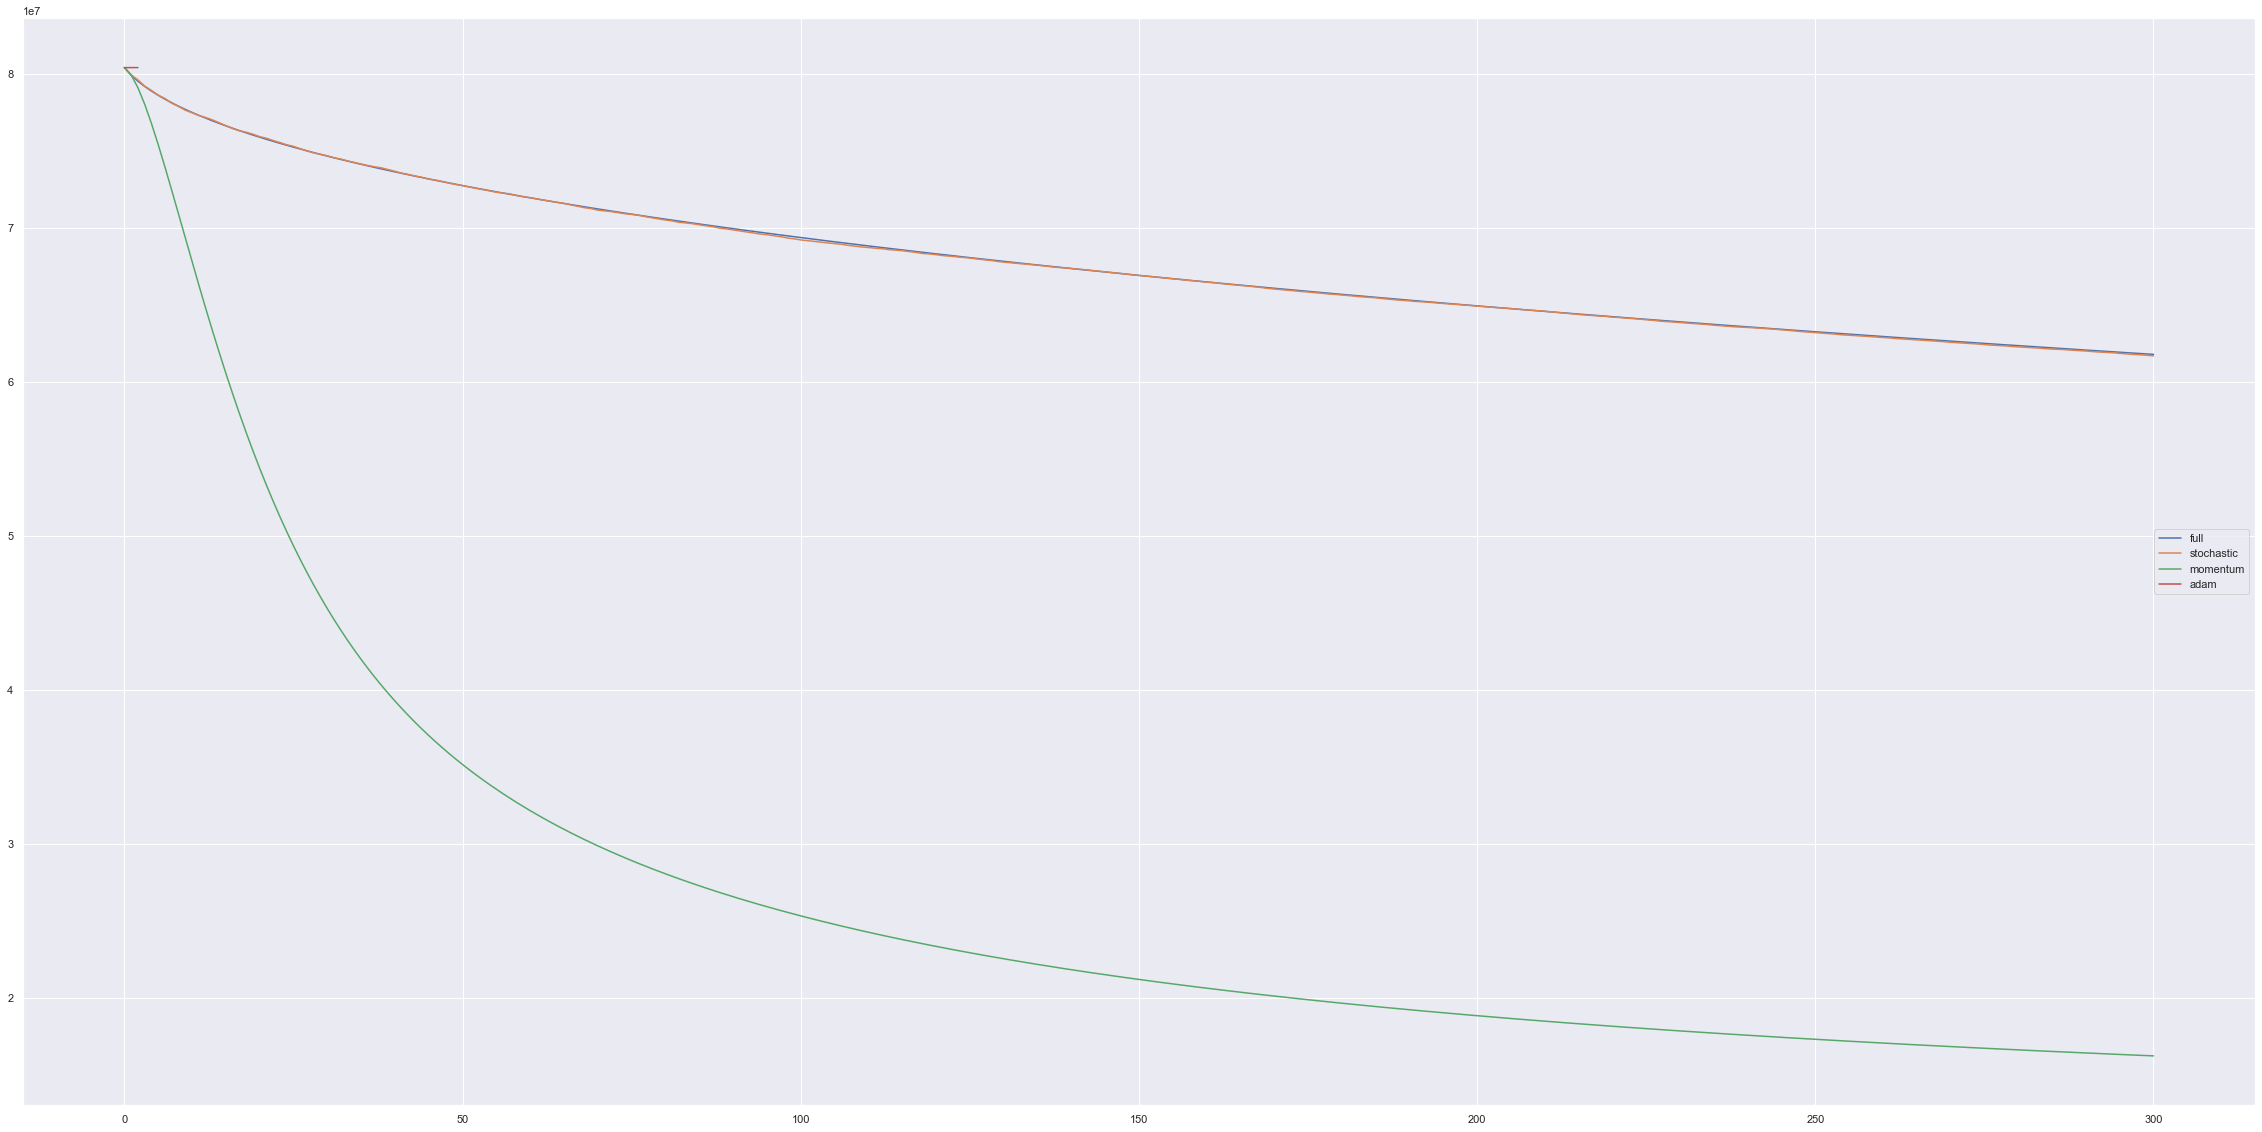

In [95]:
loss_list = {}
for descent_name in [['full', lamb_full], ['stochastic', lamb_stoch], ['momentum', lamb_mom], ['adam', lamb_adam]]:
    descent_config['descent_name'] = descent_name[0]
    linreg = LinearRegression(descent_config) 
    linreg.descent.lambda_ = descent_name[1]
    linreg.fit(X_train, y_train)
    steps = np.arange(len(linreg.loss_history))
    
    loss_list[descent_name[0]] = linreg.loss_history
    ax = sns.lineplot(steps, linreg.loss_history)
ax.legend(labels=['full', 'stochastic', 'momentum', 'adam'],loc=5)

In [96]:
pd.DataFrame(loss_list['full'])

,0
0,8.041185e+07
1,7.992682e+07
2,7.953382e+07
3,7.919562e+07
4,7.889479e+07
...,...
296,6.190833e+07
297,6.188048e+07
298,6.185270e+07
299,6.182499e+07


In [97]:
pd.DataFrame(loss_list['stochastic'])

,0
0,8.041893e+07
1,7.994838e+07
2,7.962039e+07
3,7.921982e+07
4,7.893785e+07
...,...
296,6.183022e+07
297,6.179296e+07
298,6.177042e+07
299,6.173532e+07


In [98]:
pd.DataFrame(loss_list['momentum'])

,0
0,8.042499e+07
1,7.993982e+07
2,7.911314e+07
3,7.804027e+07
4,7.679045e+07
...,...
296,1.631784e+07
297,1.629914e+07
298,1.628056e+07
299,1.626209e+07


In [99]:
pd.DataFrame(loss_list['adam'])


,0
0,8.042016e+07
1,8.042008e+07
2,8.042001e+07


In [ ]:
# обычный градиентный спуск и стохастический показали примерно одинаковый результат
# самым лучшим оказался метод momentum
# 

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [100]:
batch_sizes = np.arange(5, 500, 10)

In [101]:
descent_config['descent_name'] = 'stochastic'

CPU times: user 44.2 s, sys: 688 ms, total: 44.9 s
Wall time: 50.3 s


<AxesSubplot:>

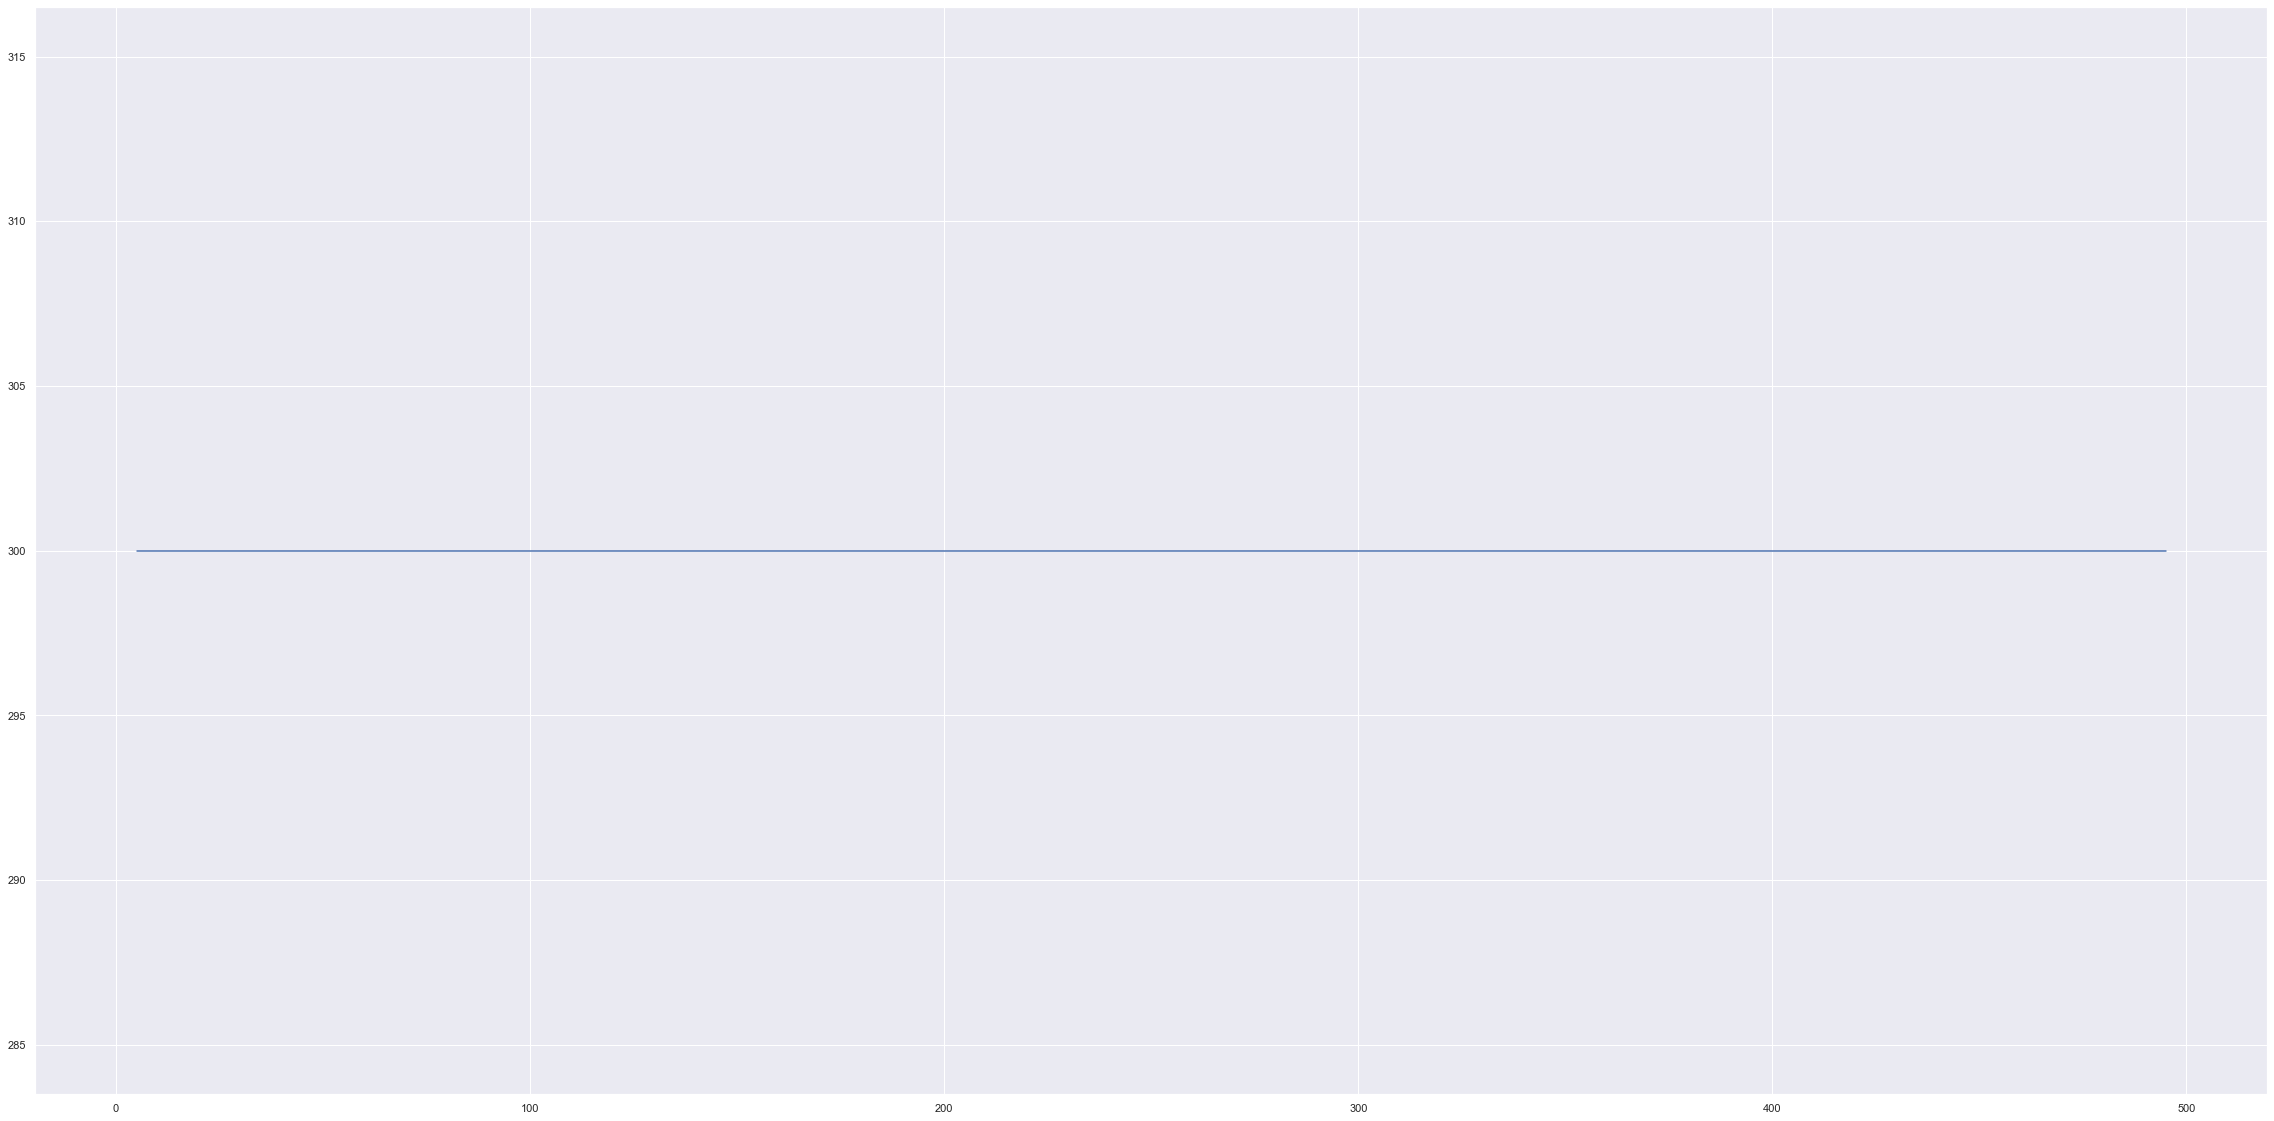

In [102]:
%%time
steps = []
for size in batch_sizes:
    descent_config['descent_name'] = 'stochastic'
    linreg = LinearRegression(descent_config) 
    linreg.descent.lambda_ = lamb_stoch
    linreg.batch_size = size
    linreg.fit(X_train, y_train)
    steps.append(len(linreg.loss_history) - 1)

sns.lineplot(batch_sizes, steps) # везде нужно больше 300 шагов)))

<AxesSubplot:>

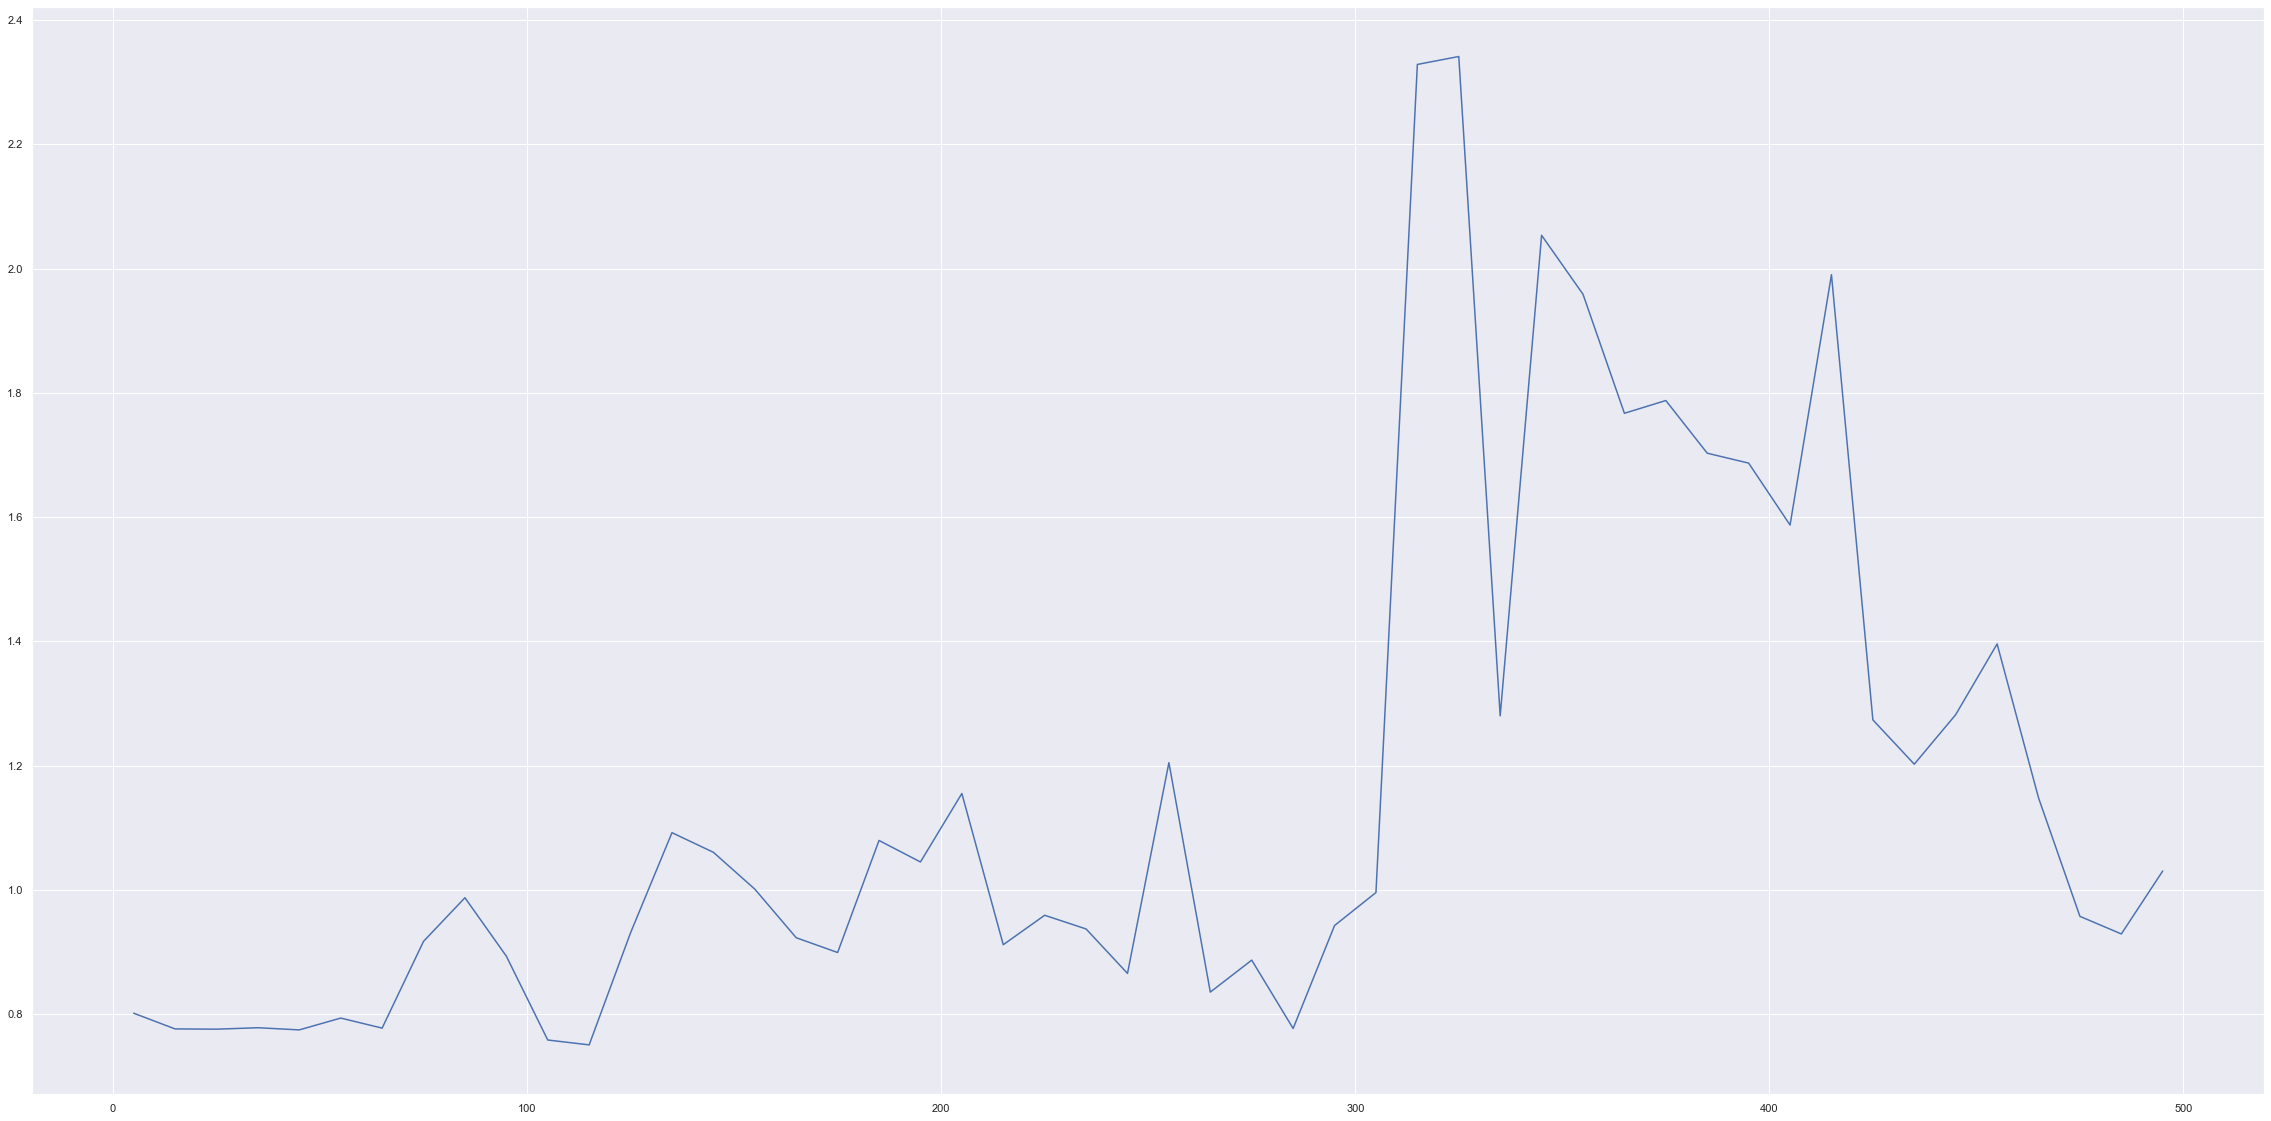

In [103]:
import time
steps = []
for size in batch_sizes:
    descent_config['descent_name'] = 'stochastic'
    linreg = LinearRegression(descent_config) 
    linreg.descent.lambda_ = lamb_stoch
    linreg.batch_size = size
    start_time = time.time()
    linreg.fit(X_train, y_train)
    steps.append(time.time() - start_time)

sns.lineplot(batch_sizes, steps) # мы видим, что время обучение достаточно неравномерное

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку: 

* **BaseDescentReg**: https://contest.yandex.ru/contest/29933/run-report/55596957/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [104]:
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'regularized':'regularized',
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

In [105]:
loss_list_reg = {}
descent_config['kwargs']['dimension'] = X_train.shape[1]

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    lamb_list = []
    for lamb in np.logspace(-1, 4, 60):
        descent_config['descent_name'] = descent_name
        linreg = LinearRegression(descent_config) 
        linreg.descent.lambda_ = lamb
        linreg.fit(X_train, y_train)
        predict = linreg.predict(X_test)

        lamb_list.append(metrics.r2_score(y_test, predict))
    loss_list_reg[f'{descent_name}'] = lamb_list



In [106]:
lamb_full = np.logspace(-1, 4, 60)[np.argmax(loss_list_reg['full'])]
lamb_full

0.7038135554931555

In [107]:
lamb_stoch = np.logspace(-1, 4, 60)[np.argmax(loss_list_reg['stochastic'])]
lamb_stoch

1.8671810912919198

In [108]:
lamb_mom = np.logspace(-1, 4, 60)[np.argmax(loss_list_reg['momentum'])]
lamb_mom


6.020894493336129

In [109]:
lamb_adam = np.logspace(-1, 4, 60)[np.argmax(loss_list_reg['adam'])]
lamb_adam


0.26529484644318957

In [110]:
loss_list = {}
for descent_name in [['full', lamb_full], ['stochastic', lamb_stoch], ['momentum', lamb_mom], ['adam', lamb_adam]]:
    mu_list = [] 
    for mu in np.logspace(-1, 4, 60):
        descent_config['descent_name'] = descent_name[0]
        linreg = LinearRegression(descent_config) 
        linreg.descent.lambda_ = descent_name[1]
        linreg.descent.mu = mu
        linreg.fit(X_train, y_train)
        predict = linreg.predict(X_test)
        mu_list.append(metrics.r2_score(y_test, predict))
    loss_list[f'{descent_name}'] = mu_list


In [111]:
mu_full = np.logspace(-1, 4, 60)[np.argmax(loss_list[f"{['full', lamb_full]}"])]
mu_full

0.1

In [112]:
mu_stoch = np.logspace(-1, 4, 60)[np.argmax(loss_list[f"{['stochastic', lamb_stoch]}"])]
mu_stoch

0.12154742500762866

In [113]:
mu_mom = np.logspace(-1, 4, 60)[np.argmax(loss_list[f"{['momentum', lamb_mom]}"])]
mu_mom

0.1

In [114]:
mu_adam = np.logspace(-1, 4, 60)[np.argmax(loss_list[f"{['adam', lamb_adam]}"])]
mu_adam

1168.9518164985777

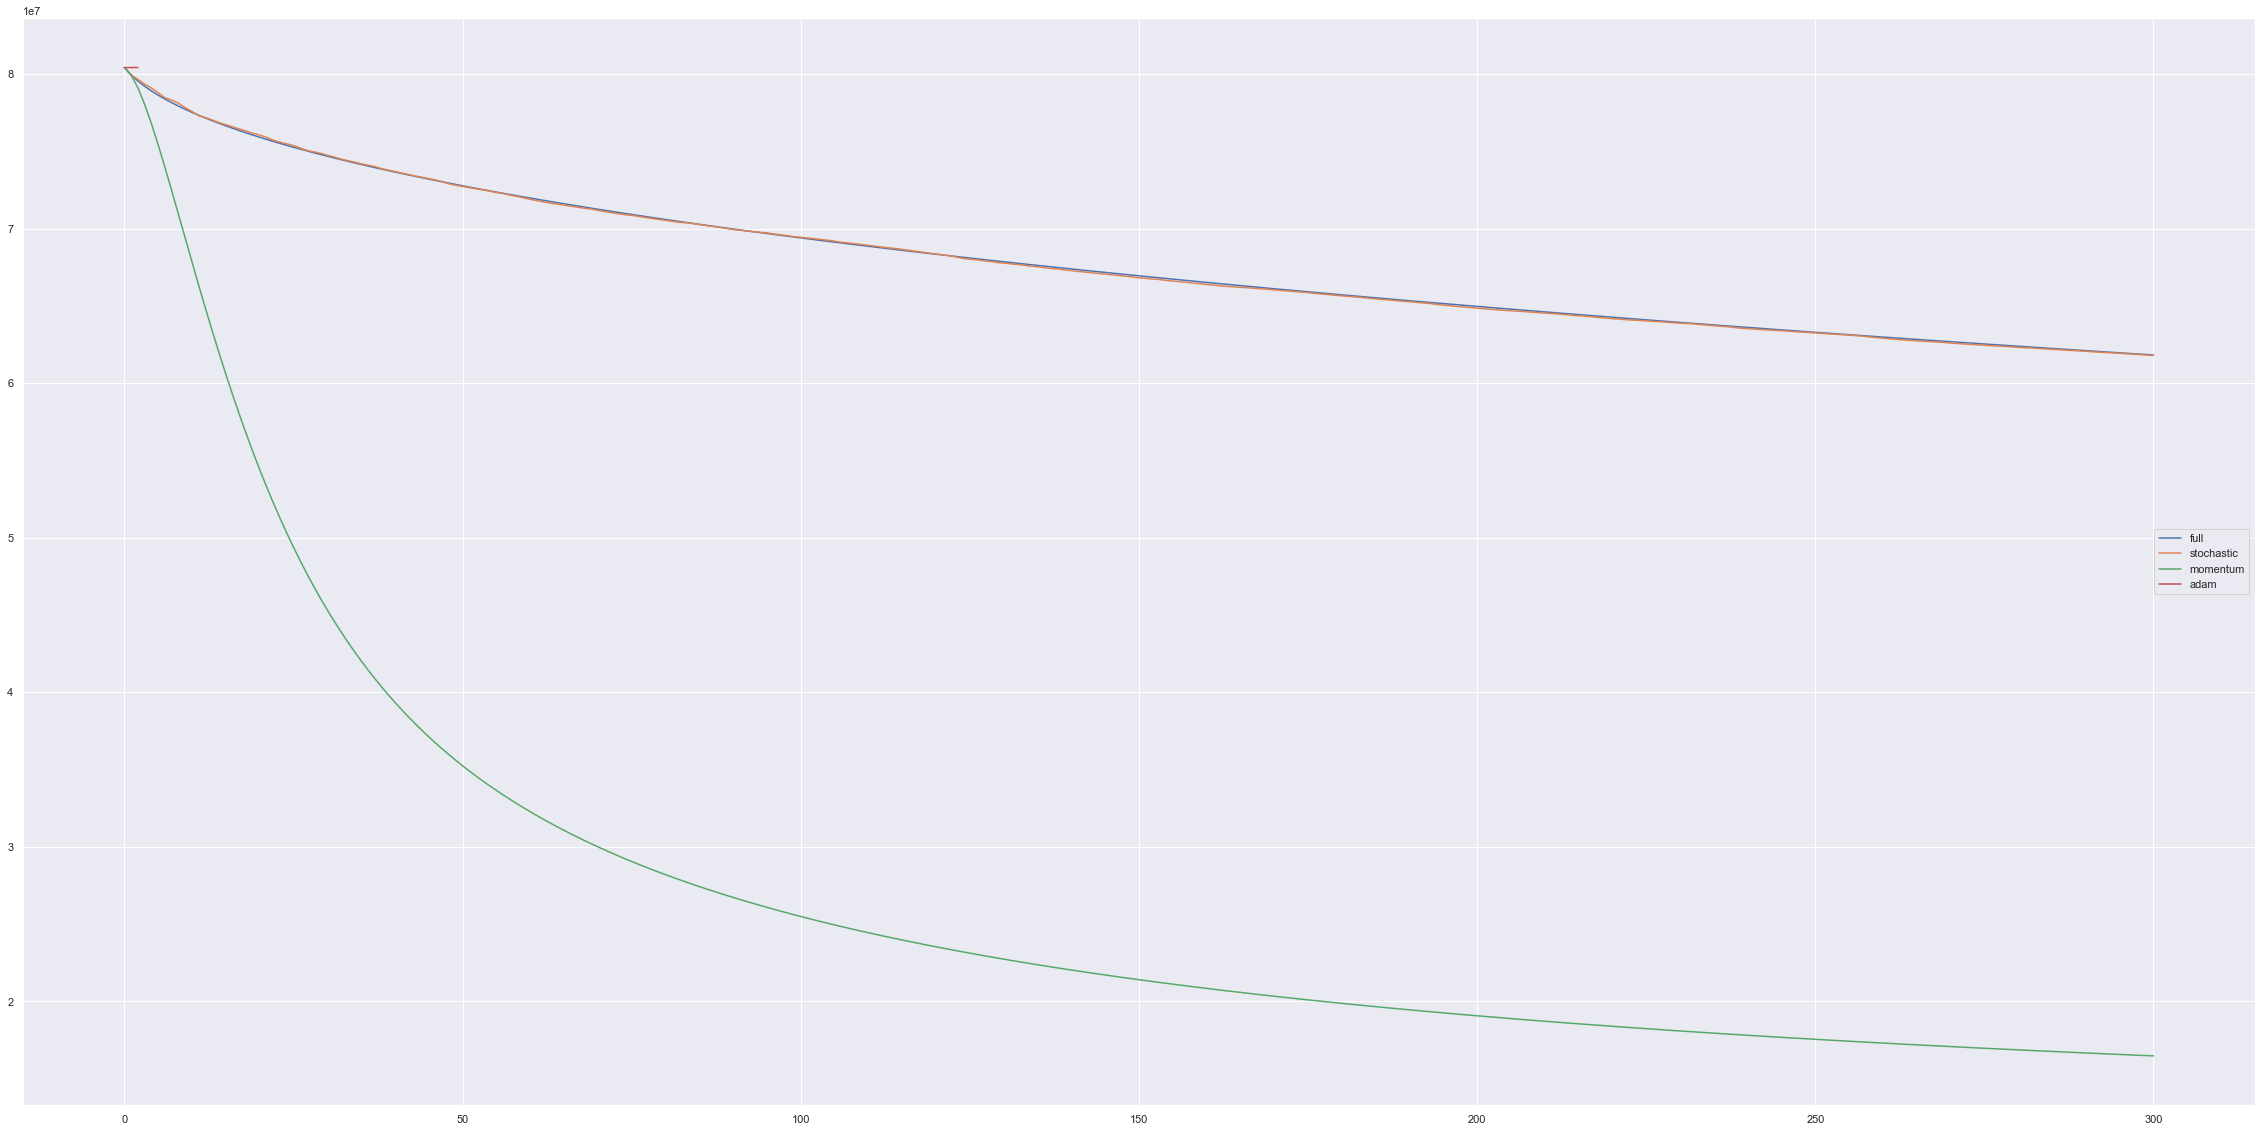

In [115]:
loss_list = {}
for descent_name in [['full', lamb_full, mu_full], 
                     ['stochastic', lamb_stoch, mu_stoch], 
                     ['momentum', lamb_stoch, mu_mom], 
                     ['adam', lamb_adam, mu_adam]]:
    descent_config['descent_name'] = descent_name[0]
    linreg = LinearRegression(descent_config) 
    linreg.descent.lambda_ = descent_name[1]
    linreg.descent.mu= descent_name[2]
    linreg.fit(X_train, y_train)
    steps = np.arange(len(linreg.loss_history))
    
    loss_list[descent_name[0]] = linreg.loss_history
    ax = sns.lineplot(steps, linreg.loss_history)
ax.legend(labels=['full', 'stochastic', 'momentum', 'adam'],loc=5)

In [ ]:
# мы видим, что картинка особо не изменилась(
# адам так и остался мертвым


`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### Картинка ниже ###`

In [ ]:
from IPython.display import Image
Image("2021-10-27 04.56.58.jpg") 

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [ ]:
# #np.array([((np.tanh(X_train @ linreg.descent.w - y_train)))]) @ X_train
# np.log1p(np.cosh(X_train @ linreg.descent.w.T - y_train))
# # X_train @ linreg.descent.w.T

In [ ]:
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

In [ ]:
loss_list = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    linreg = LinearRegression(descent_config) 
    linreg.descent.lambda_ = descent_name
    linreg.fit(X_train, y_train)
    steps = np.arange(len(linreg.loss_history))
    
    loss_list[descent_name[0]] = linreg.loss_history
    sns.lineplot(steps, linreg.loss_history)



### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

In [ ]:
Image("прогулка.jpg") 


### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
#реализуем AMSGrad

In [116]:
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}

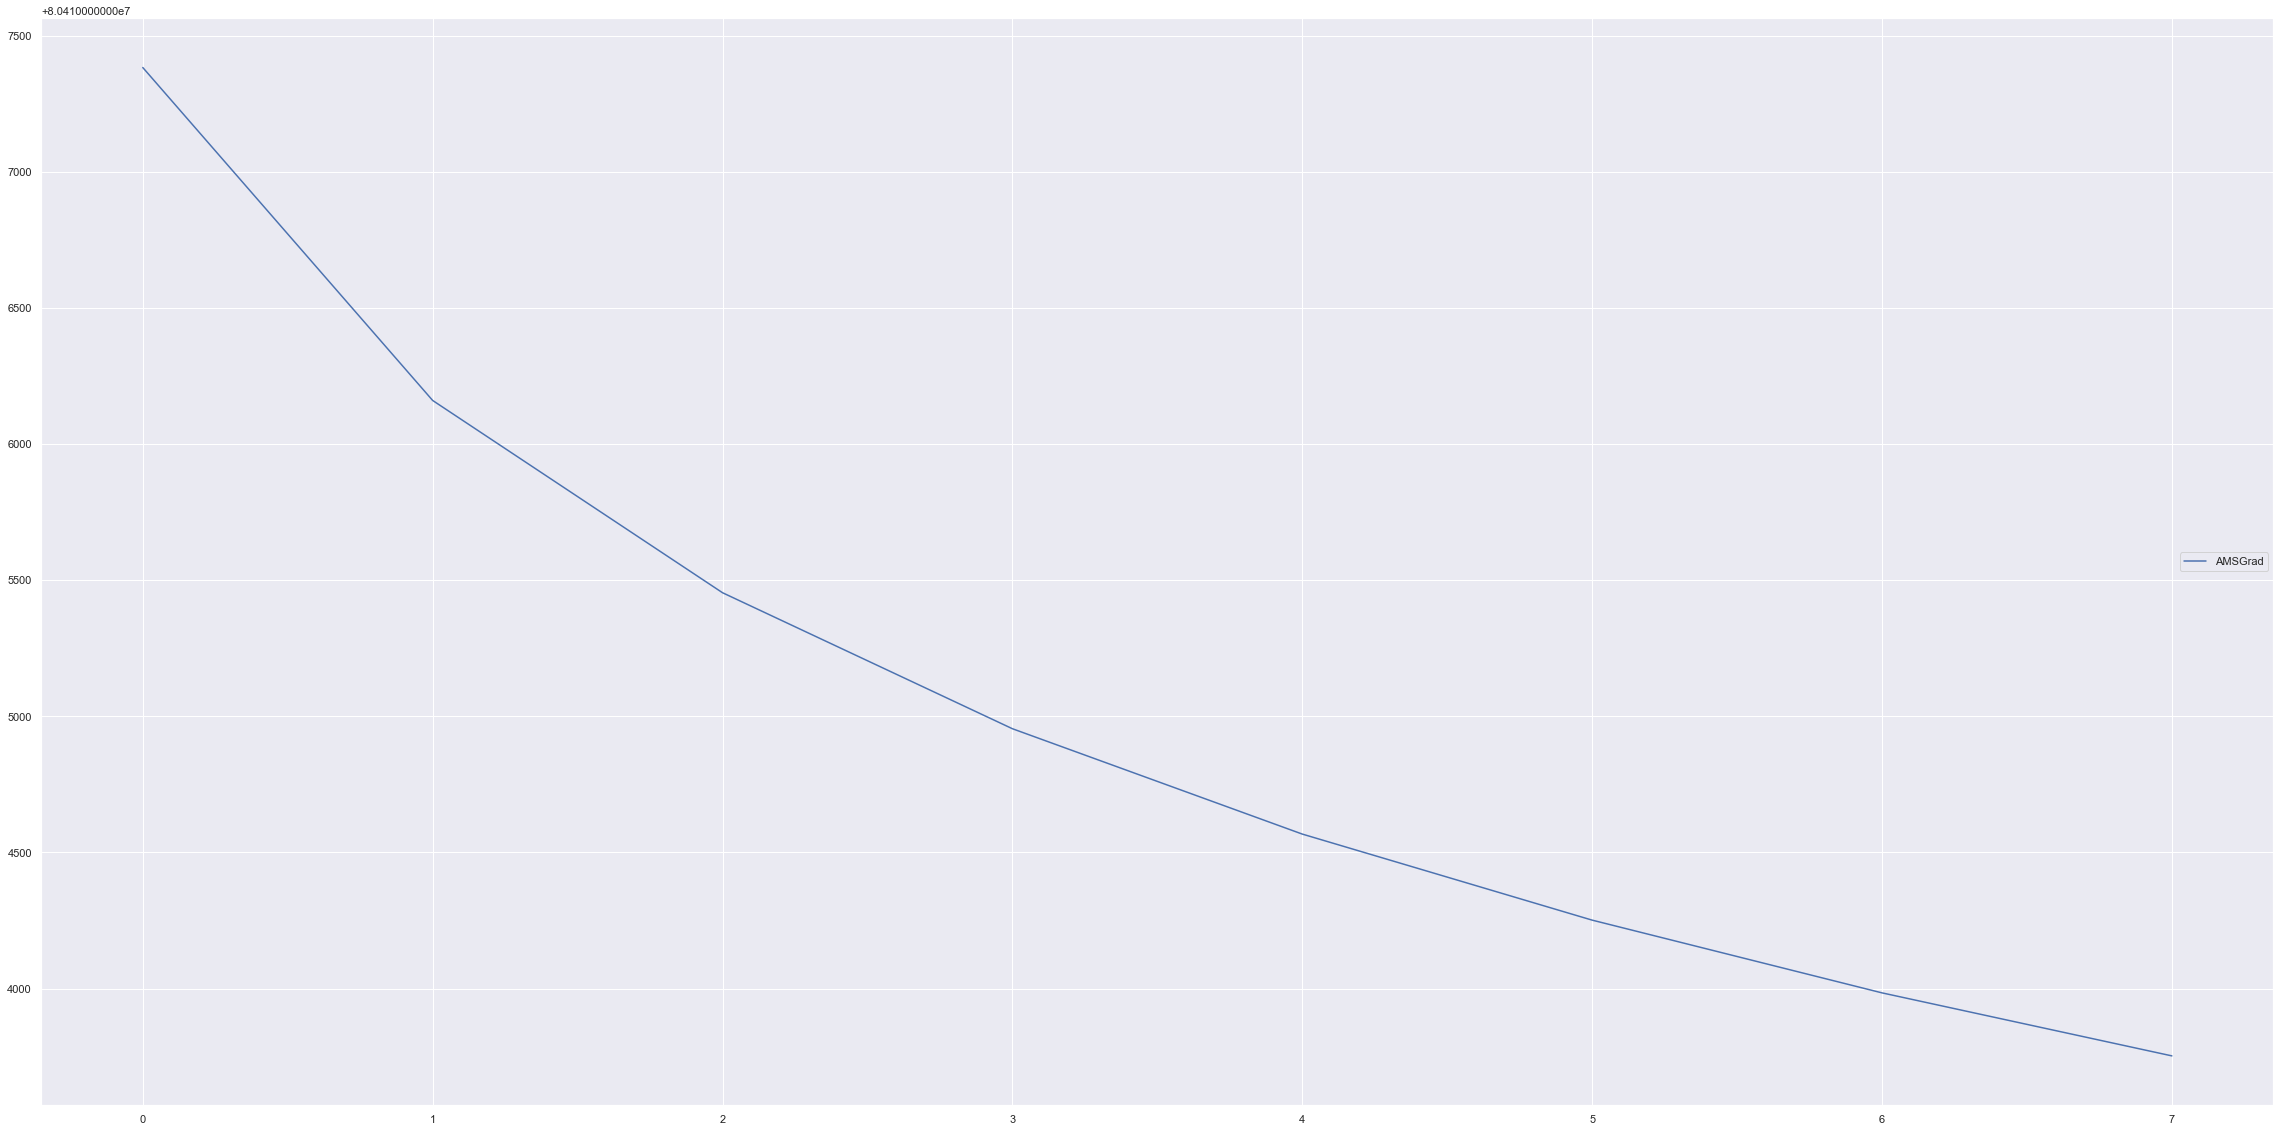

In [117]:
descent_config['descent_name'] = 'AMSGrad'
linreg = LinearRegression(descent_config) 
linreg.fit(X_train, y_train)
steps = np.arange(len(linreg.loss_history))

loss_list[descent_name[0]] = linreg.loss_history
ax = sns.lineplot(steps, linreg.loss_history)
ax.legend(labels=['AMSGrad'],loc=5)

In [ ]:
# этот метод работает чуть лучше, чем обычный Adam))

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
Image("hub_mae.jpg") 